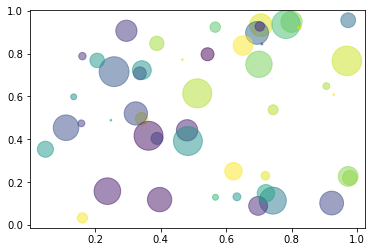

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig("start.png", bbox_inches = 'tight', dpi=300)

## About this document
This document contains the analysis and report for the Assessment of CASA0006-Data Science for Spatial Systems

The notebook requires approx 40 mins to run

Student ID: 21203086

Word count: 3871

--------------------------------------------------------------------------------------------------------------------------------

# CALIFORNIA HOUSE PRICE INDEX PREDICTION 

<a id="ID_intr"></a>
| [1.0 Introduction](#ID_intro) | [2.0 Literature review](#ID_lit) | [3.0 Research Question](#ID_RQ) | [4.0 Presentation of Data](#ID_data) | [5.0 Methodology](#ID_methods) | [6.0 Analysis](#ID_analysis) | [7.0 Results and Discussion](#ID_results) | [8.0 Conclusion](#ID_concl) | [Bibliography](#ID_biblio) | [Appendix](#ID_append) |

<a id="ID_intro"></a>
## 1.0 | Introduction 

According to the Understanding Inequalities Project ''the housing market has a key role in "sorting" poorer households into areas with the worst pollution, schools, crime, and employment.'' (Housing | Understanding Inequalities, no date). While housing is a basic human need, for some, homeownership is an unachievable goal and for others another great investment opportunity. Housing affordability has long been a very pressing matter for cities around the world and although housing discrimination and practices such as Redlining in the USA have been condemned decades ago, the housing crisis in states such as California is still present (Chew and Muñoz Flegal, 2020).

This study will investigate whether house index price variations are affected by environmental and socioeconomic factors and test the premise that pollution, unemployment, and health statistics all contribute to the overall house price trends. For this, California is chosen as a case study, and a variety of environmental, health and socioeconomic indicators for its census tracts are used to predict house price index variations for the same area using and comparing different machine learning algorithms. 

This analysis is structured as follows: After a brief summary of relevant literature in section 2, section 3 poses the research question of this paper. The presentation of the datasets in section 4 is then followed by section 5 outlining the methodology used throughout the analysis (section 6). Section 7 presents the results that are discussed in more detail in section 8. Finally, section 9 concludes and proposes further research objectives on this topic.

<a id="ID_lit"></a>
## 2.0 | Literature Review

House prices, like the economy, are in constant flux and are of course affected and driven by many factors, which is why house price estimation and the study of the drivers behind has been and still is, a broad field of study. For decades many of these studies were based on hedonic regression models (Jafari & Akhavian, 2019) that quantify the influence of the various factors on the good (i.e. price), estimating the influence attributes such as the number of bedrooms or the location have on the demand or price of the house (Hedonic Regression Definition, 2022).

(Hanink et al., 2012) and (Montero et al., 2018) however criticise these models as they do not incorporate the spatial parameter inherent in property data. They argue that spatial heterogeneity and spatial autocorrelation need to be accounted for and therefore proceed their analysis based on Geographically Weighted Regression (GWR) and spatial hedonic models such as spatial error models (SEM) and global spatial autoregressive (SAR) models. 

Machine learning methods have been employed to model housing prices since the early 2000 and as Park and Kwon Bae indicate, multiple studies have tested their performance against traditional hedonic models. The authors themselves proceed to comparing various classifiers and conclude that these can significantly contribute towards accurate house price predictions (Park & Kwon Bae, 2015). 
Similarly, but more recently, (Phan, 2019) compare different algorithms, among them, Regression Tree and Support Vector Machine (SVM), in combination with dimensionality reduction methods in order to predict house prices in Melbourne from the properties’ features.

Multiple studies have examined the relation between environmental and socio-economic factors and the real-estate market. (Barreca et al., 2018) showed the spatial correlation between housing and social vulnerability indicators and house prices while (Montero et al., 2018) focused on the ¬-impact of the environment, concluding that house prices are strongly affected by pollution and odours. However, their measure of environmental factors was based on the resident’s perception, which is a somewhat subjective measure and arguably difficult to be generalised. A paper by Boyle and Kiel, is a comprehensive review of hedonic model studies that considered the environmental factors of air quality, water quality and distance from toxic sites (Boyle & Kiel, 2001). 

This study will as well compare different machine learning methods in combination with dimensionality reduction, but instead of focusing on a specific city, it will be conducted on the whole of California using the spatial unit of the U.S Census tracts. Moreover, differently from previous studies and partially driven by the unavailability of data in the public domain, this research will not focus on individual house prices but the change in the House Price Index for each census tract which will also enable to shift the focus to the influence of environmental and socioeconomic factors rather than the properties’ attributes.  

<a id="ID_RQ"></a>
## 3.0 | Research Question

The research question is split into two sub-questions formulated as follows:

    RQ1 | Is there a relationship between the variation of the House Price Index and environmental, health, and socioeconomic indexes of census tracts in California?
    
    RQ2 | Can the change in House Price Index  for a census tract be predicted from environmental, health, and socioeconomic indexes?

<a id="ID_data"></a>
## 4.0 | Presentation of Data

The data used for this analysis were obtained from the following sources:

* [CalEnviroScreen 4.0](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), downloaded 06 April 2021:

A detailed dataset containing a variety of environmental and health indicators for California’s 8000 census tracts from which the CalEnviroScores are calculated, a measure of pollution and potential vulnerability of a population to the effects of pollution. The results are summarised in a report and featured in an online mapping tool, The California Communities Environmental Health Screening Tool that aims to ‘provide a clear picture of cumulative pollution burdens and vulnerabilities in communities throughout the state’ (August et al., 2021). This study will be using the latest version of this dataset, published in October 2021 by the Office of Environmental Health Hazard Assessment (OEHHA).


* [House Price Index Census Tracts](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx), downloaded 04 April 2021:

An extensive dataset containing House Price Index values on census tract level across USA for each year since 1975. The House Price Index (HPI) is a broad measure of price changes of single-family houses, measuring repeat sales on the same properties. (FHFA House Price Index | Federal Housing Finance Agency, no date). The HPI is published by the Feral Housing Finance Agency (FHFA) and serves as an indicator of house price change and can be used to estimate housing affordability. This study will be using the most recent dataset available online, including information up to 2021.

**Variables:**

Since the HPI is a measure of change, the value itself has little meaning. Therefore, the difference between two points in time is considered more appropriate for this analysis and the dependent variable is defined as the difference in the HPI value between 2017 and 2019. This timeframe corresponds to the CalEnviroScreen 4.0 data and does not consider 2020 and 2021, which due to the Covid19 pandemic, are not representative years and could have unusual trends. Finally, it should be mentioned that a HPI index with a common base line year was chosen so that the values are directly comparable across census tracts. After comparing the number of missing values, the HPI2000 was selected over the HPI1990. 

All independent variables for this study derive from the CalEnviroScreen4.0 dataset. Indicators such as the CalEviroScore (CES), indicators averaging subset of indicators, and the percentile version of indicators, were excluded from this study as it is not clear how these were calculated. While the difference between the indicator values from the same time period (2017-2019) might have been more accurate, the accompanying report states that the calculation method for multiple indicators has been improved in the 4.0 version (August et al., 2021). This means that the values between this and the CalEnviroScreen 3.0 dataset will not have been directly comparable. Since this study is focusing on HPI change across census tracts we will assume the change in pollution indicators between two years as minimal and focus more on the differences across the census tracts.  

More detailed information for each variable can be found in the Data Dictionary accompanying each dataset.


For ease of access, the data has been saved in this [GitHub repository](https://github.com/DaphneBdn/dsss_repo) 

<a id="ID_methods"></a>
## 5.0 | Methodology

The methodology of this report will be laid out in detail in the analysis section of this notebook. A summary however of the main important points is presented here:

Data cleaning and Initial data exploration

After the initial data cleaning, sub-setting and filtering, the basic summary statistics showed the existence of a large number of outliers in many of the independent variables as well as in the dependent variable itself. The analysis proceeds without their removal as each entry represents a census tract and therefore a valuable part of the geographic entity of California.
 
Data preparation

Both datasets contain a considerable number of entries with missing values. After the 2 datasets have been joined these entries are removed, leaving the dataset with just over half of California's 8000 census tracts.  It is nevertheless considered a large enough dataset to be split into test, validation, and training sets in preparation for the subsequent analysis.

In-depth analysis

This study uses regression analysis methods to investigate the relationship between the dependent and independent variable and test whether the different models used can predict the change in HPI. 
Even though the scatterplots between each of the independent variables and our dependent variable show that there is no linear relationship, a linear regression model is used as a baseline model, for the evaluation of the performance of the more complicated supervised machine learning models implemented.
The coefficient of determination R2 will be used for model performance evaluation and comparison. The training of the models will be solely done with the training set, the validation set will be used for hyperparameter tuning and as is common practice the testing set will be used only for the final evaluation of each model.
A Random Forest Regression model and a XGBoost model (Gradient Boosting Decision Tree) are used followed by hyperparameter tuning by performing two different methods: holdout validation and cross-validation. Permutation feature importance is applied in all cases, aiming to identify the most important variables for the HPI change prediction and in an attempt to better interpret and understand the results and performance of the models. 
Finally, it tested whether the best performing model can be improved further by applying Principal Component Analysis (a dimensionality reduction technique) beforehand on the set of independent variables. 
For more details, please refer to the Analysis section.  

<a id="ID_analysis"></a>
## 6.0 | Analysis

This section contains the code and documentation of the analysis.

### 6.1 Data Cleaning

First, the necessary libraries need to be imported 

In [2]:
# data manipulation and processing
#import os
import math
import numpy as np
import pandas as pd
#import geopandas as gpd

# analysis

import re #regular expressions
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import statsmodels.api as sm


# Packages for visualisation
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

# reproducability settings
random_state = 42 
np.random.seed(random_state)

from time import time

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
#plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


Reading in the data

#### 6.1.1 House Price Index data

In [3]:
# Load in the House Price Index data 
#dfprice = pd.read_csv('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/HPI_AT_BDL_tract.csv')
dfprice = pd.read_csv('data/raw/HPI_AT_BDL_tract.csv')
dfprice.head(5)

tract state_abbr  year                            annual_change  \
0  1001020100         AL  1998                                      NaN   
1  1001020100         AL  1999                                  -5.6000   
2  1001020100         AL  2000                                   5.0600   
3  1001020100         AL  2001                                   7.0800   
4  1001020100         AL  2002                                   7.1100   

                                       hpi  hpi1990  \
0                                 100.0000      NaN   
1                                  94.4000      NaN   
2                                  99.1800      NaN   
3                                 106.2100      NaN   
4                                 113.7600      NaN   

                                   hpi2000  
0                                 100.8200  
1                                  95.1800  
2                                 100.0000  
3                                 107.0800  
4                                 114.7000

In [4]:
#check the size of the dataframe
dfprice.shape

(1900555, 7)

In [5]:
# check the datatype of each column 
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900555 entries, 0 to 1900554
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   tract          int64  
 1   state_abbr     object 
 2   year           int64  
 3   annual_change  float64
 4   hpi            float64
 5   hpi1990        float64
 6   hpi2000        float64
dtypes: float64(4), int64(2), object(1)
memory usage: 101.5+ MB


In [6]:
#print out the basic summary statistics
dfprice.describe()

tract  \
count                           1,900,555.0000   
mean                       26,735,177,864.7755   
std                        15,951,002,393.1383   
min                         1,001,020,100.0000   
25%                        12,086,014,602.0000   
50%                        26,099,261,700.0000   
75%                        39,153,532,999.0000   
max                        56,045,951,300.0000   

                                          year  \
count                           1,900,555.0000   
mean                                2,005.6030   
std                                     9.9569   
min                                 1,975.0000   
25%                                 1,998.0000   
50%                                 2,006.0000   
75%                                 2,014.0000   
max                                 2,021.0000   

                                 annual_change  \
count                           1,760,778.0000   
mean                                    4.0588   
std                                     8.4450   
min                                   -69.0200   
25%                                    -0.4500   
50%                                     3.6900   
75%                                     8.3400   
max                                   161.1700   

                                           hpi  \
count                           1,849,439.0000   
mean                                  199.2799   
std                                   121.5691   
min                                    25.7200   
25%                                   126.0200   
50%                                   164.9300   
75%                                   229.6500   
max                                 2,300.6001   

                                       hpi1990  \
count                             928,870.0000   
mean                                  162.2173   
std                                    73.3383   
min                                    15.6300   
25%                                   103.0300   
50%                                   149.3000   
75%                                   203.0600   
max                                 1,040.4301   

                                       hpi2000  
count                           1,620,987.0000  
mean                                  123.8407  
std                                    49.7491  
min                                    10.5800  
25%                                    88.4600  
50%                                   114.6500  
75%                                   149.3600  
max                                   596.4100

Check for missing values:

In [7]:
# print out a table of NA values
total = dfprice.isnull().sum().sort_values(ascending=False)
percent = (dfprice.isnull().sum()/dfprice.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total NA values', 'Percent of NA Values'])
missing_data.head(20)

Total NA values                     Percent of NA Values
hpi1990                 971685                                   0.5113
hpi2000                 279568                                   0.1471
annual_change           139777                                   0.0735
hpi                      51116                                   0.0269
tract                        0                                   0.0000
state_abbr                   0                                   0.0000
year                         0                                   0.0000

After the first inspection of the data the key things to note are: 
* There are 1,048,575 entries in total, containing information for the whole State of California
* There are multiple NA values which will need to be addressed.  
* hpi1990 has more than 50% of NA values
* The data covers the years 1975-2021
* There are no categorical variables

The dataset will be filtered and subsetted to:
* Extract census tracts of California only.
* Keep only 'hpi1990' as the dependent variable, so that all tracts have the same baseline year.
* Year: keep the most recent year with the least NA values


In [8]:
# filter out California
dfCAall = dfprice[dfprice['state_abbr']=="CA"]

In [9]:
#check the size of the dataframe
dfCAall.shape

(264546, 7)

In [10]:
#print out the column names
columns = dfCAall.columns
columns

Index(['tract', 'state_abbr', 'year', 'annual_change', 'hpi', 'hpi1990',
       'hpi2000'],
      dtype='object')

In [11]:
#create the list of columns to be dropped
todrop=['annual_change', 'hpi','hpi1990']

#drop the columns and check the dataframe
dfCAall.drop(columns=todrop, inplace=True)
dfCAall

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


tract state_abbr  year                                  hpi2000
77893   6001400100         CA  1986                                  31.2500
77894   6001400100         CA  1987                                  32.2700
77895   6001400100         CA  1988                                  40.5800
77896   6001400100         CA  1989                                  44.6300
77897   6001400100         CA  1990                                  47.1400
...            ...        ...   ...                                      ...
342434  6115041102         CA  2017                                 145.8800
342435  6115041102         CA  2018                                 165.7700
342436  6115041102         CA  2019                                 176.1200
342437  6115041102         CA  2020                                 186.9800
342438  6115041102         CA  2021                                 216.6600

[264546 rows x 4 columns]

In [12]:
# rename the hpi1990 column for ease
dfCAall.rename(columns = {'hpi2000':'hpi'}, inplace = True)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
# Check the NAs in the HPI column in the 5 most recent years

yearlist = [2018,2019,2020,2021]

for i in yearlist: 
    dftemp = dfCAall[dfCAall['year']==i]
    print(f'Year {i} has {dftemp.hpi.isna().sum()} NA values in the HPI column')
    

Year 2018 has 1545 NA values in the HPI column
Year 2019 has 1332 NA values in the HPI column
Year 2020 has 1059 NA values in the HPI column
Year 2021 has 1082 NA values in the HPI column


There is a significant number of missing values even for the most recent years. 

As described above, the depended variable will be created as the difference between 2017 and 2019

In [14]:
# subset the dataframe for the years 2017 and 2019
hpi_change = dfCAall[(dfCAall['year']==2017) | (dfCAall['year']==2019)]
hpi_change

tract state_abbr  year                                      hpi
77924   6001400100         CA  2017                                      NaN
77926   6001400100         CA  2019                                 191.0000
77960   6001400200         CA  2017                                 244.0000
77962   6001400200         CA  2019                                 255.8500
78003   6001400300         CA  2017                                 274.7900
...            ...        ...   ...                                      ...
342377  6115041002         CA  2019                                 215.3200
342405  6115041101         CA  2017                                 183.9000
342407  6115041101         CA  2019                                 202.0000
342434  6115041102         CA  2017                                 145.8800
342436  6115041102         CA  2019                                 176.1200

[15425 rows x 4 columns]

In [15]:
# use the pivot function to convert the year values to columns
hpi_change_pivot = hpi_change.pivot(index= 'tract', columns=['year'], values='hpi').reset_index()
hpi_change_pivot

year       tract                                     2017  \
0     6001400100                                      NaN   
1     6001400200                                 244.0000   
2     6001400300                                 274.7900   
3     6001400400                                 316.1300   
4     6001400500                                 295.0700   
...          ...                                      ...   
7709  6115040901                                 172.9000   
7710  6115041001                                 179.7600   
7711  6115041002                                 195.7600   
7712  6115041101                                 183.9000   
7713  6115041102                                 145.8800   

year                                     2019  
0                                    191.0000  
1                                    255.8500  
2                                    277.4600  
3                                    315.3600  
4                                    319.9800  
...                                       ...  
7709                                 201.5100  
7710                                 210.7400  
7711                                 215.3200  
7712                                 202.0000  
7713                                 176.1200  

[7714 rows x 3 columns]

In [16]:
# create a new column which will be the dependent variable
hpi_change_pivot['hpi_diff'] = hpi_change_pivot[2019]-hpi_change_pivot[2017]
hpi_change_pivot

year       tract                                     2017  \
0     6001400100                                      NaN   
1     6001400200                                 244.0000   
2     6001400300                                 274.7900   
3     6001400400                                 316.1300   
4     6001400500                                 295.0700   
...          ...                                      ...   
7709  6115040901                                 172.9000   
7710  6115041001                                 179.7600   
7711  6115041002                                 195.7600   
7712  6115041101                                 183.9000   
7713  6115041102                                 145.8800   

year                                     2019  \
0                                    191.0000   
1                                    255.8500   
2                                    277.4600   
3                                    315.3600   
4                                    319.9800   
...                                       ...   
7709                                 201.5100   
7710                                 210.7400   
7711                                 215.3200   
7712                                 202.0000   
7713                                 176.1200   

year                                 hpi_diff  
0                                         NaN  
1                                     11.8500  
2                                      2.6700  
3                                     -0.7700  
4                                     24.9100  
...                                       ...  
7709                                  28.6100  
7710                                  30.9800  
7711                                  19.5600  
7712                                  18.1000  
7713                                  30.2400  

[7714 rows x 4 columns]

#### 6.1.2 CalEnviro Data

Load the dataset that will be used for the independent variables.

In [17]:
#env21= pd.read_excel('https://github.com/DaphneBdn/dsss_repo/blob/main/data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")

env21= pd.read_excel('data/raw/calenviroscreen40resultsdatadictionary_F_2021.xlsx', sheet_name="CES4.0FINAL_results")
env21.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                             CES 4.0 Score  \
0                                  93.1836   
1                                  86.6538   
2                                  82.3939   
3                                  81.3279   
4                                  80.7455   

                        CES 4.0 Percentile  CES 4.0 Percentile Range  ...  \
0                                 100.0000  95-100% (highest scores)  ...   
1                                  99.9874  95-100% (highest scores)  ...   
2                                  99.9748  95-100% (highest scores)  ...   
3                                  99.9622  95-100% (highest scores)  ...   
4                                  99.9496  95-100% (highest scores)  ...   

                 Linguistic Isolation Pctl  \
0                                  79.3747   
1                                  95.5339   
2                                  81.5537   
3                                  78.7116   
4                                  86.5611   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Poverty Pctl  \
0                                  98.9196   
1                                  98.3920   
2                                  93.3920   
3                                  95.3518   
4                                  98.3040   

                              Unemployment  \
0                                  12.8000   
1                                  19.8000   
2                                   6.4000   
3                                  15.7000   
4                                  13.7000   

                         Unemployment Pctl  \
0                                  93.8313   
1                                  99.2061   
2                                  61.5305   
3                                  97.3451   
4                                  95.2889   

                            Housing Burden  \
0                                  30.3000   
1                                  31.2000   
2                                  20.3000   
3                                  35.4000   
4                                  32.7000   

                       Housing Burden Pctl  \
0                                  91.0393   
1                                  92.2814   
2                                  63.9670   
3                                  96.4132   
4                                  94.1572   

                               Pop. Char.   \
0                                  93.1551   
1                                  93.1654   
2                                  83.7518   
3                                  94.6412   
4                                  95.398

In [18]:
#check the size
env21.shape

(8035, 58)

In [19]:
env21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8    CES 4.0 Percentile          7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [20]:
# extract the column names
cols=env21.columns
print(cols)
print()
print(f"The Enviro 3.0 dataset has {len(cols)} columns")

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Approximate Location', 'Longitude', 'Latitude', 'CES 4.0 Score',
       ' CES 4.0 Percentile', 'CES 4.0 Percentile Range', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Lead', 'Lead Pctl',
       'Pesticides', 'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl',
       'Traffic', 'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', 'Linguistic Isolation', 'Linguistic Isolation Pctl'

In [21]:
# table of NA values
total = env21.isnull().sum().sort_values(ascending=False)
percent = (env21.isnull().sum()/env21.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total NA values', 'Percent of NA Values'])
missing_data.head(20)

Total NA values  \
Unemployment Pctl                      335   
Unemployment                           335   
Linguistic Isolation                   320   
Linguistic Isolation Pctl              320   
Low Birth Weight Pctl                  227   
Low Birth Weight                       227   
Housing Burden Pctl                    145   
Housing Burden                         145   
Pop. Char. Pctl                        103   
Education Pctl                         103   
Education                              103   
CES 4.0 Percentile Range               103   
 CES 4.0 Percentile                    103   
CES 4.0 Score                          103   
Pop. Char.                             103   
Pop. Char. Score                       103   
Lead                                    96   
Lead Pctl                               96   
Poverty Pctl                            75   
Poverty                                 75   

                                              Percent of NA Values  
Unemployment Pctl                                           0.0417  
Unemployment                                                0.0417  
Linguistic Isolation                                        0.0398  
Linguistic Isolation Pctl                                   0.0398  
Low Birth Weight Pctl                                       0.0283  
Low Birth Weight                                            0.0283  
Housing Burden Pctl                                         0.0180  
Housing Burden                                              0.0180  
Pop. Char. Pctl                                             0.0128  
Education Pctl                                              0.0128  
Education                                                   0.0128  
CES 4.0 Percentile Range                                    0.0128  
 CES 4.0 Percentile                                         0.0128  
CES 4.0 Score                                               0.0128  
Pop. Char.                                                  0.0128  
Pop. Char. Score                                            0.0128  
Lead                                                        0.0119  
Lead Pctl                                                   0.0119  
Poverty Pctl                                                0.0093  
Poverty                                                     0.0093

While this dataset does have missing values, they only form a very small percentage.

In [22]:
# drop the generalised indicators and percentiles
env21.drop("Pollution Burden", axis=1, inplace=True) 
env21.drop("Pollution Burden Score", axis=1, inplace=True)

dfsub = env21[env21.columns.drop(list(env21.filter(regex='Pctl')))]
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='Char')))]
dfsub = dfsub[dfsub.columns.drop(list(dfsub.filter(regex='CES')))]

# check it worked
dfsub.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location                                Longitude  \
0               Fresno                                -119.7817   
1             Stockton                                -121.2879   
2          Los Angeles                                -118.1975   
3               Fresno                                -119.8277   
4               Fresno                                -119.8055   

                                  Latitude  \
0                                  36.7097   
1                                  37.9432   
2                                  34.0175   
3                                  36.7345   
4                                  36.7355   

                                     Ozone  \
0                                   0.0603   
1                                   0.0459   
2                                   0.0479   
3                                   0.0603   
4                                   0.0603   

                                     PM2.5  \
0                                  13.9063   
1                                  11.8841   
2                                  12.2516   
3                                  13.5209   
4                                  13.8190   

                                 Diesel PM  ...  Imp. Water Bodies  \
0                                   1.1227  ...                  0   
1                                   0.5381  ...                 13   
2                                   0.7808  ...                  7   
3                                   0.1738  ...                  0   
4                                   1.3897  ...                  0   

                               Solid Waste  \
0                                   6.0000   
1                                   9.2500   
2                                   4.8500   
3                                   5.7500   
4                                   0.0000   

                                    Asthma  \
0                                 129.5400   
1                                 105.8800   
2                                  76.1000   
3                                 139.4500   
4                                 139.0800   

                          Low Birth Weight  \
0                                   7.8000   
1                                   6.8800   
2                                   7.1100   
3                                  10.6500   
4                                  10.2500   

                    Cardiovascular Disease  \
0                                  21.4700   
1                                  20.2600   
2                                  20.8700   
3                                  22.6800   
4                                  22.6400   

                                 Education  \
0                                  44.5000   
1                                  46.4000   
2                                  52.2000   
3                                  41.4000   
4                                  43.6000   

                      Linguistic Isolation  \
0                                  16.0000   
1                                  29.7000   
2                                  17.1000   
3                                  15.7000   
4                                  20.0000   

                                   Poverty  \
0                                  76.0000   
1                                  73.2000   
2                                  62.6000   
3                                  65.7000   
4                                  72.7000   

                              Unempl

In [23]:
# drop rows with NA values
dfsub.dropna(axis=0, how='any', inplace=True)
#check it worked
dfsub.isna().sum().sort_values(ascending=False)

Census Tract              0
Total Population          0
Unemployment              0
Poverty                   0
Linguistic Isolation      0
Education                 0
Cardiovascular Disease    0
Low Birth Weight          0
Asthma                    0
Solid Waste               0
Imp. Water Bodies         0
Haz. Waste                0
Groundwater Threats       0
Cleanup Sites             0
Traffic                   0
Tox. Release              0
Pesticides                0
Lead                      0
Drinking Water            0
Diesel PM                 0
PM2.5                     0
Ozone                     0
Latitude                  0
Longitude                 0
Approximate Location      0
ZIP                       0
California County         0
Housing Burden            0
dtype: int64

In [24]:
#check the size of the dataframe after the NA removal
dfsub.shape

(7355, 28)

In [25]:
# check the number of tracts
dfsub['Census Tract'].nunique()

7355

# rename table and column to not change everywhere, should do it if i keep it

In [26]:
# rename the column
hpi_change_pivot.rename(columns = {'hpi_diff':'hpi'}, inplace=True)

In [27]:
# merge the enviro data with the HPI data with an inner join 
cal_joined = pd.merge(dfsub, hpi_change_pivot, left_on = "Census Tract", right_on = "tract", how = "inner")
cal_joined

Census Tract  Total Population California County    ZIP  \
0       6077000700              4680       San Joaquin  95206   
1       6037204920              2751       Los Angeles  90023   
2       6019001202              4561           Fresno   93725   
3       6037291220              3640       Los Angeles  90247   
4       6037243100              6772       Los Angeles  90059   
...            ...               ...               ...    ...   
5588    6001421600              3617          Alameda   94708   
5589    6081609700              4936         San Mateo  94062   
5590    6085507302              2892       Santa Clara  95070   
5591    6081609601              3363         San Mateo  94070   
5592    6041126100              6195            Marin   94941   

                        Approximate Location  \
0                                   Stockton   
1                                Los Angeles   
2          Unincorporated Fresno County area   
3                                Los Angeles   
4                                Los Angeles   
...                                      ...   
5588                                Berkeley   
5589                            Redwood City   
5590  Unincorporated Santa Clara County area   
5591                              San Carlos   
5592                             Mill Valley   

                                    Longitude  \
0                                   -121.2879   
1                                   -118.1975   
2                                   -119.7410   
3                                   -118.2867   
4                                   -118.2351   
...                                       ...   
5588                                -122.2560   
5589                                -122.2803   
5590                                -122.0292   
5591                                -122.2833   
5592                                -122.5405   

                                     Latitude  \
0                                     37.9432   
1                                     34.0175   
2                                     36.7027   
3                                     33.8771   
4                                     33.9328   
...                                       ...   
5588                                  37.8840   
5589                                  37.4682   
5590                                  37.2383   
5591                                  37.4953   
5592                                  37.9122   

                                        Ozone  \
0                                      0.0459   
1                                      0.0479   
2                                      0.0613   
3                                      0.0413   
4                                      0.0438   
...                                       ...   
5588                                   0.0294   
5589                                   0.0330   
5590                                   0.0398   
5591                                   0.0319   
5592                                   0.0319   

                                        PM2.5  \
0                                     11.8841   
1                                     12.2516   
2                                     13.9661   
3                                     12.0661   
4                                     12.0902   
...                                       ...   
5588                                   8.9978   
5589                                   7.9757   
5590                                   7.2742   
5591                                   8.0768   
5592                                   8.4158   

                                    Diesel PM  ...  \
0                                      0.5381  ...   
1                                      0.7808  ...   
2                                      0.2029  ...   
3                                      0.6369  ...   
4                     

In [28]:
# the rows with missing information after the join will need to be dropped
cal_joined.dropna(axis=0, how='any', inplace=True)
cal_joined.shape

(4675, 32)

It is important to note here that according to the [United States Census Bureau](https://www.census.gov/geographies/reference-files/2010/geo/state-local-geo-guides-2010/california.html), California has **8,057** census tracts. After NA removal the dataframe lists 4675 entires, meaning that the almost half of the census tracts are not included.

In [29]:
# print out the column names
cal_joined.columns

Index([          'Census Tract',       'Total Population',
            'California County',                    'ZIP',
         'Approximate Location',              'Longitude',
                     'Latitude',                  'Ozone',
                        'PM2.5',              'Diesel PM',
               'Drinking Water',                   'Lead',
                   'Pesticides',           'Tox. Release',
                      'Traffic',          'Cleanup Sites',
          'Groundwater Threats',             'Haz. Waste',
            'Imp. Water Bodies',            'Solid Waste',
                       'Asthma',       'Low Birth Weight',
       'Cardiovascular Disease',              'Education',
         'Linguistic Isolation',                'Poverty',
                 'Unemployment',         'Housing Burden',
                        'tract',                     2017,
                           2019,                    'hpi'],
      dtype='object')

In [30]:
# create a list of the columns to be dropped, in order to keep only the dependent and independent variabels
todrop = ['Census Tract', 'Total Population', 'California County', 'ZIP','Approximate Location', 'Longitude', 'Latitude', 'tract', 2017,2019]

In [31]:
# drop the columns
dfall = cal_joined.drop(columns=todrop)
dfall.head()

Ozone  \
3                                   0.0413   
4                                   0.0438   
6                                   0.0561   
8                                   0.0454   
9                                   0.0438   

                                     PM2.5  \
3                                  12.0661   
4                                  12.0902   
6                                  12.1126   
8                                  12.0487   
9                                  12.0999   

                                 Diesel PM  \
3                                   0.6369   
4                                   0.8055   
6                                   0.1961   
8                                   0.7018   
9                                   0.3207   

                            Drinking Water  \
3                                 805.5744   
4                                 787.9403   
6                                 856.8068   
8                                 668.9440   
9                                 787.9403   

                                      Lead  \
3                                  66.0691   
4                                  75.6277   
6                                  53.4788   
8                                  93.1372   
9                                  84.2373   

                                Pesticides  \
3                                  66.4967   
4                                   0.0000   
6                               6,840.3760   
8                                   0.0000   
9                                   0.0000   

                              Tox. Release  \
3                              19,774.7897   
4                               8,878.6133   
6                                  99.2163   
8                               6,048.8031   
9                               6,373.3134   

                                   Traffic  \
3                               3,455.2393   
4                               2,484.9657   
6                               1,013.6639   
8                               2,127.7817   
9                               3,154.0982   

                             Cleanup Sites  \
3                                  16.0000   
4                                  16.9000   
6                                  14.0000   
8                                 109.1000   
9                                   0.9500   

                       Groundwater Threats  ...  \
3                                  37.5500  ...   
4                                  13.1500  ...   
6                                  73.9500  ...   
8                                  55.5500  ...   
9                                  16.0000  ...   

                               Solid Waste  \
3                                   4.2000   
4                                   0.2000   
6                                  14.5000   
8                                  18.7500   
9                                   7.2000   

                                    Asthma  \
3                                  64.7700   
4                                 129.2000   
6                                  77.6500   
8                                  50.8300   
9                                 113.8800   

                          Low Birth Weight  \
3                                   7.7700   
4                                   9.4800   
6                                   5.6000   
8                                   5.4800   
9                                   7.0700   

                    Cardiovascular Disease  \
3                                  12.9900   
4                                  26.4800   
6                                  24.3700   
8                                  17.7000   
9                                  27.8800   

                                 Education  \
3                                  31.6000   
4                                  44

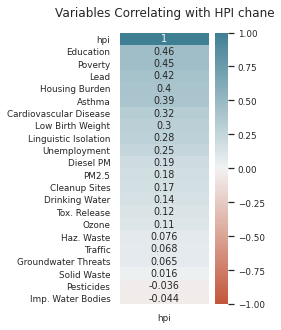

In [32]:
mypalette = sns.diverging_palette(20,220, as_cmap=True)
# check the correlation
plt.figure(figsize=(2,5))
sns.set(font_scale=.8)
mypalette = sns.diverging_palette(20,220, as_cmap=True)
heatmap = sns.heatmap(dfall.corr()[['hpi']].sort_values(by='hpi', ascending=False), vmin=-1, vmax=1, annot=True, cmap=mypalette)
heatmap.set_title('Variables Correlating with HPI chane', fontdict={'fontsize':12}, pad=16);
#plt.savefig('Survival_rate_corr_S1.png', dpi=300, bbox_inches='tight')

#### 6.1.3 summary statistics

In [33]:
#print out the basic summary statistics
dfall.describe()

Ozone  \
count                               4,675.0000   
mean                                    0.0488   
std                                     0.0103   
min                                     0.0266   
25%                                     0.0419   
50%                                     0.0472   
75%                                     0.0568   
max                                     0.0731   

                                         PM2.5  \
count                               4,675.0000   
mean                                   10.1712   
std                                     2.0838   
min                                     3.1197   
25%                                     8.6129   
50%                                    10.0184   
75%                                    11.9232   
max                                    15.9846   

                                     Diesel PM  \
count                               4,675.0000   
mean                                    0.1960   
std                                     0.1977   
min                                     0.0002   
25%                                     0.0682   
50%                                     0.1373   
75%                                     0.2588   
max                                     2.6053   

                                Drinking Water  \
count                               4,675.0000   
mean                                  468.0795   
std                                   217.3631   
min                                    32.5689   
25%                                   298.0225   
50%                                   425.1846   
75%                                   669.9023   
max                                 1,179.4788   

                                          Lead  \
count                               4,675.0000   
mean                                   49.4109   
std                                    22.4459   
min                                     0.0000   
25%                                    31.5318   
50%                                    49.4758   
75%                                    67.1477   
max                                    97.7963   

                                    Pesticides  \
count                               4,675.0000   
mean                                  250.5498   
std                                 2,293.5847   
min                                     0.0000   
25%                                     0.0000   
50%                                     0.0000   
75%                                     0.1338   
max                                80,811.0894   

                                  Tox. Release  \
count                               4,675.0000   
mean                                1,617.5261   
std                                 3,621.8934   
min                                     0.0000   
25%                                   107.6414   
50%                                   471.8532   
75%                                 1,548.3354   
max                                80,652.8900   

                                       Traffic  \
count                               4,675.0000   
mean                                1,126.6218   
std                                 1,057.6082   
min                                    25.5781   
25%                                   560.2843   
50%                                   869.3085   
75%                                 1,396.2948   
max                                45,752.0000   

                                 Cleanup Sites  \
count                               4,675.0000   
mean                                    7.2687   
std                                    13.2999   
min                                     0.0000   
25%                                     0.0000   
50%                                     1.6500   
75%                                     9.1250   
max                              

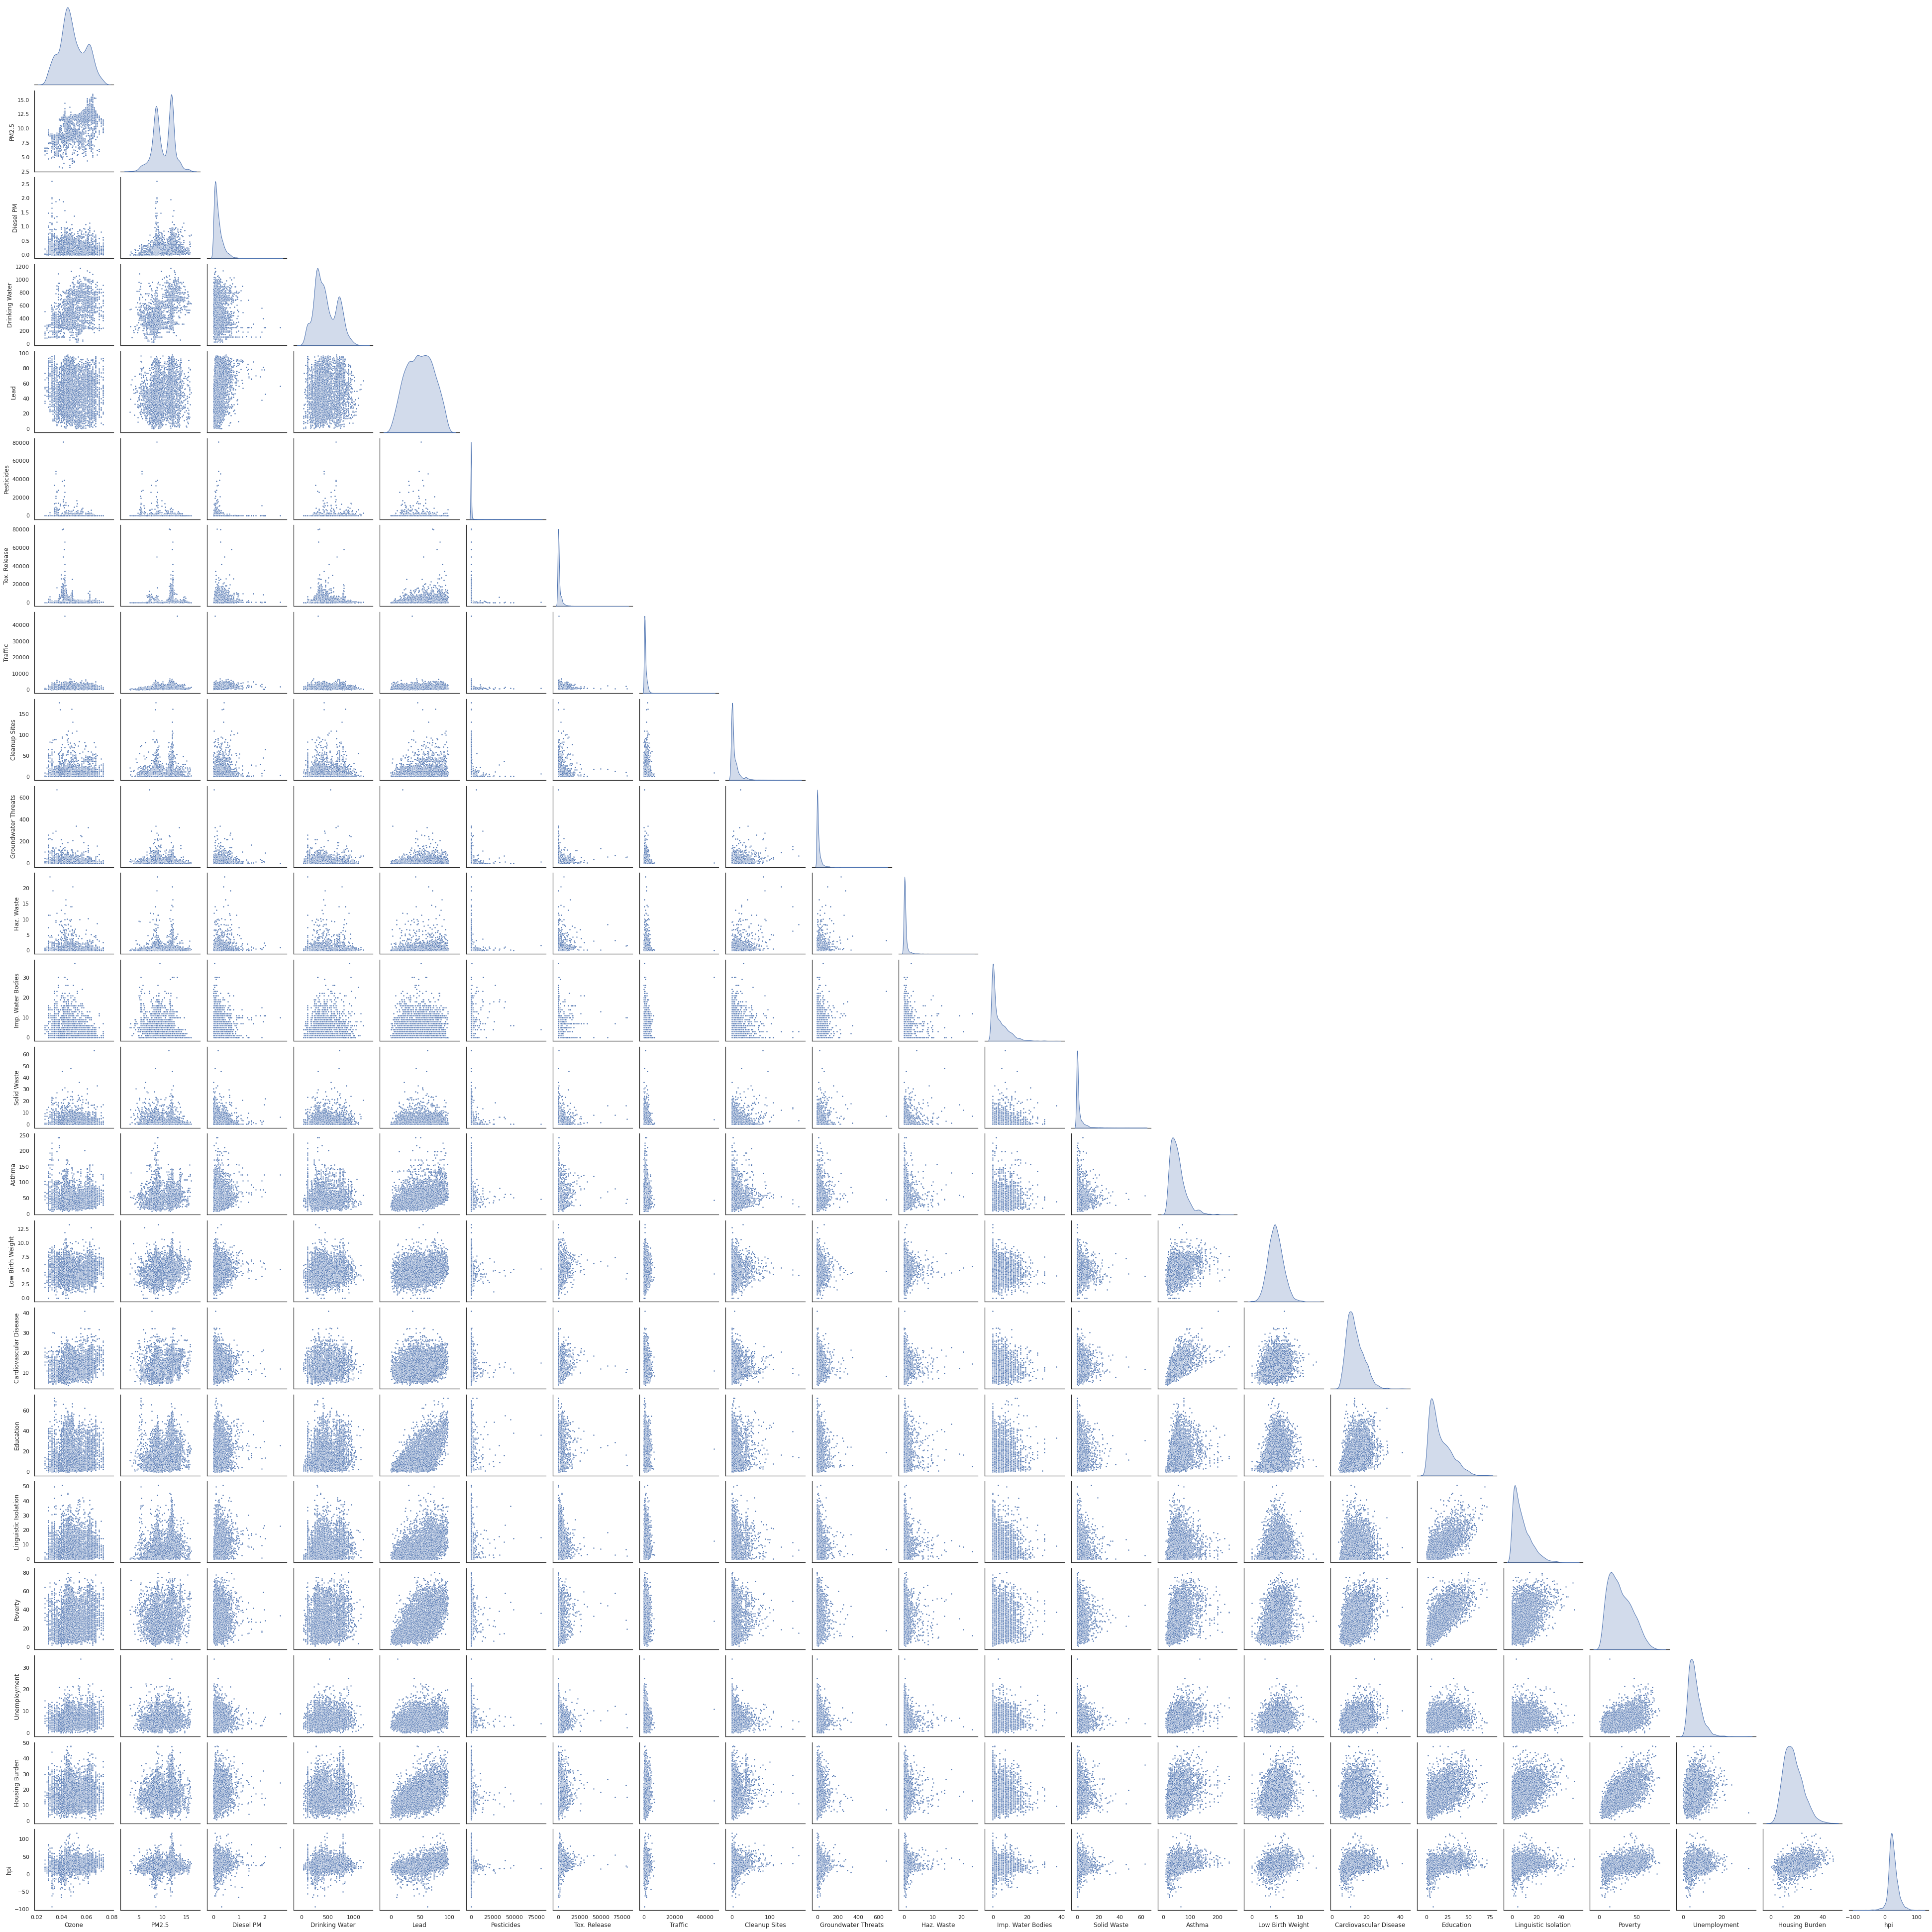

In [34]:
# use a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=dfall, markers=".", diag_kind='kde', corner=True)

The KDE plots above show that most of the variables are not normally distributed. Furthermore, as the last row of the scatterplots shows. none of the independent variables displays a linear relationship with the dependent variable (hpi). Therefore, a multivariate linear regression model will not be appropriate for explaining this relationship.

array([[<AxesSubplot:title={'center':'Ozone'}>,
        <AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'Diesel PM'}>,
        <AxesSubplot:title={'center':'Drinking Water'}>,
        <AxesSubplot:title={'center':'Lead'}>],
       [<AxesSubplot:title={'center':'Pesticides'}>,
        <AxesSubplot:title={'center':'Tox. Release'}>,
        <AxesSubplot:title={'center':'Traffic'}>,
        <AxesSubplot:title={'center':'Cleanup Sites'}>,
        <AxesSubplot:title={'center':'Groundwater Threats'}>],
       [<AxesSubplot:title={'center':'Haz. Waste'}>,
        <AxesSubplot:title={'center':'Imp. Water Bodies'}>,
        <AxesSubplot:title={'center':'Solid Waste'}>,
        <AxesSubplot:title={'center':'Asthma'}>,
        <AxesSubplot:title={'center':'Low Birth Weight'}>],
       [<AxesSubplot:title={'center':'Cardiovascular Disease'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Linguistic Isolation'}>,
        <AxesS

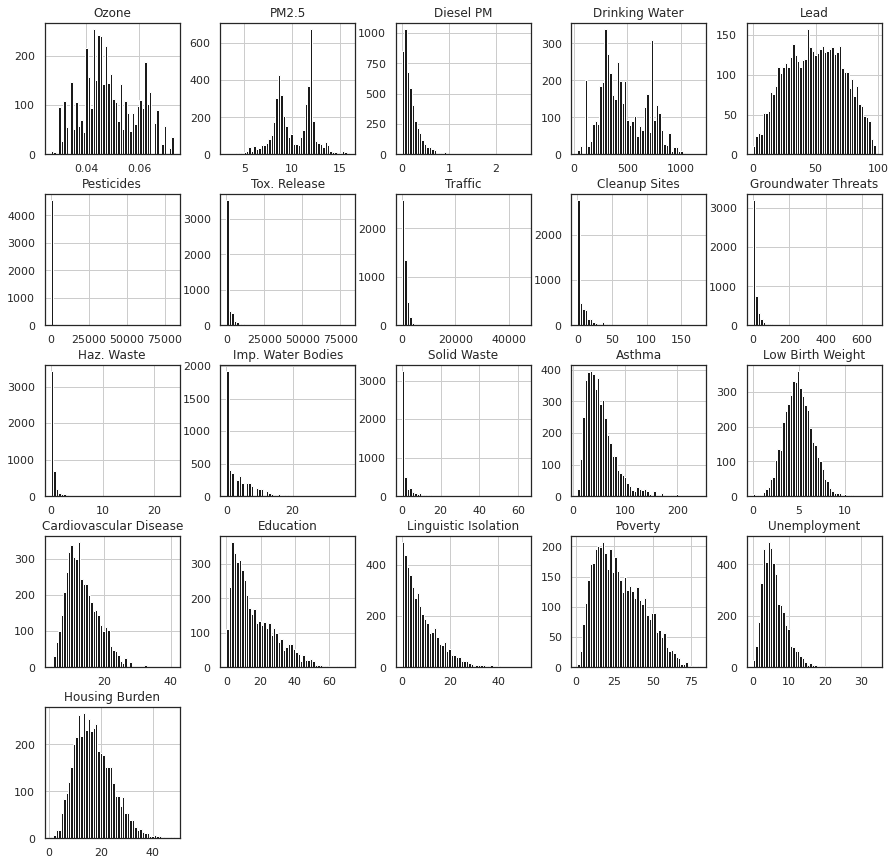

In [35]:
# plot the distribution of all independent variables 
dfall.drop("hpi", axis=1).hist(bins=50, figsize=(15, 15),color='k')

<AxesSubplot:ylabel='Frequency'>

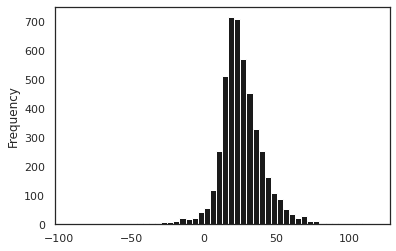

In [36]:
## plot histogram 
dfall['hpi'].plot.hist(bins=50 ,color='k') 

<AxesSubplot:>

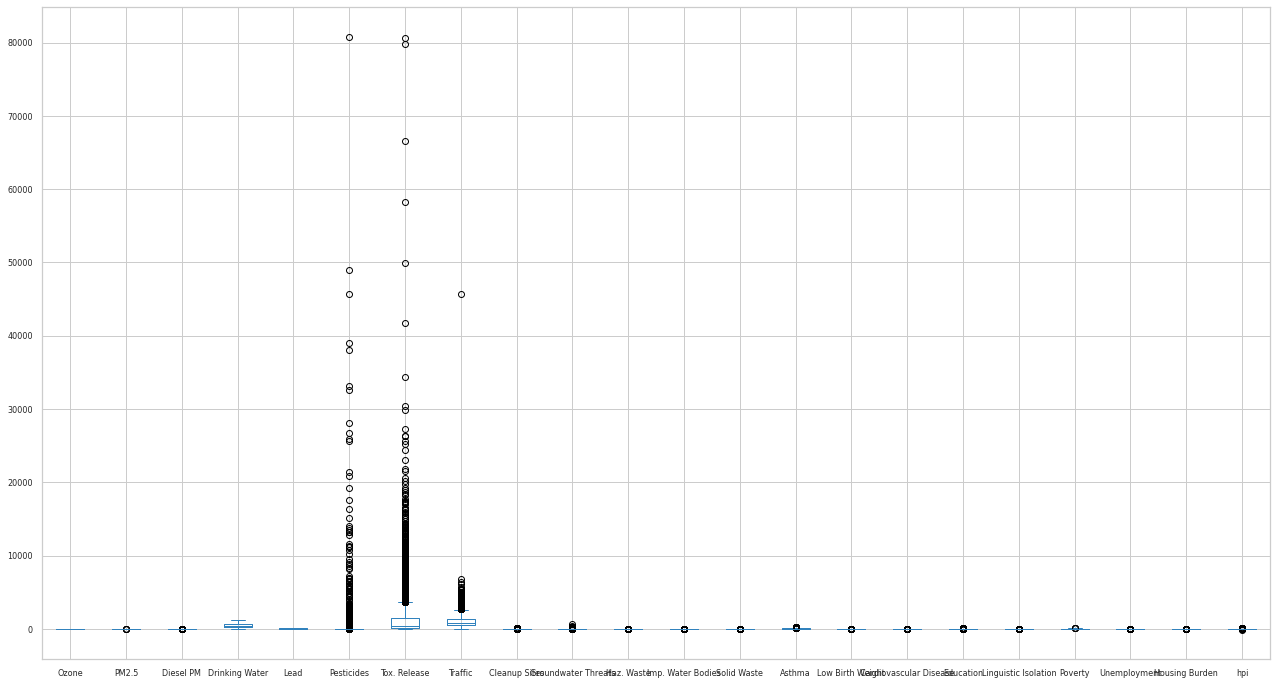

In [37]:
# boxplots 

sns.set_style("whitegrid")

dfall.boxplot(
            figsize=(22,12),fontsize =8, color = "#3182bd")

#plt.savefig("boxplots.png", bbox_inches = 'tight',dpi=300)

The boxplots indicate the existence of outliers in all variables with a few of them recording extreme outliers: "Pesticides","Tox.Release", "Traffic"

In [38]:
dfall.columns

Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi'],
      dtype='object')

In [39]:
# create a list of the independent variables without the 3 varibles with extreme variables

boxplotlist =[ 'Ozone','PM2.5', 'Diesel PM'
             # , 'Drinking Water'
              , 'Lead',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden',
       'hpi']

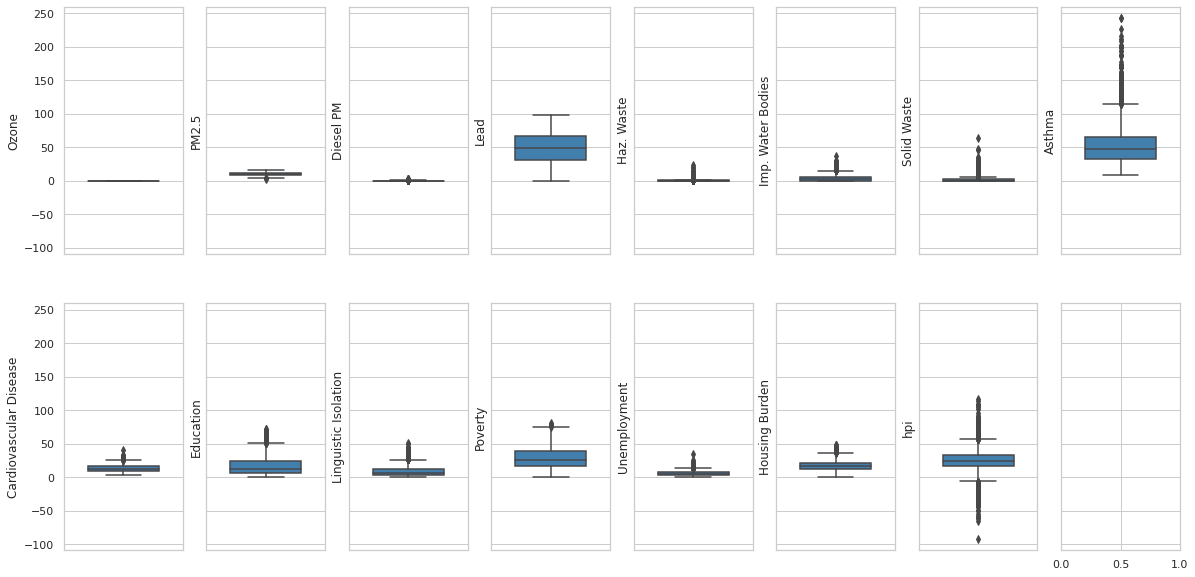

In [40]:
# print again the boxplots for better inspection

fig, ax = plt.subplots(2,8, figsize=(20, 10) ,sharey=True)
ax = ax.flatten()

for i in boxplotlist:
    sns.boxplot(y=i, data=dfall,width=0.6,ax=ax[boxplotlist.index(i)],color = "#3182bd")

## comment the boxplots, the spread and outliers

In [41]:
#dfall.drop(columns=['Pesticides','Tox. Release', 'Traffic'], inplace=True)

In [42]:
#dfall.head()

### 6.2 Data preparation

#### 6.2.1 train-test split]

## ADD some text here

In [43]:
# split the data in training and testing set for linear  regresssion (which does not need a validation data)
train_x, test_x, train_y, test_y = train_test_split(dfall.drop(['hpi'], axis = 1), dfall.hpi, random_state=random_state)

In [44]:
# TRAIN TEST SPLIT FOR VALIDATION!

# create the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

print(X.shape)
print(y.shape)

# We apply train_test_split twice to obtain the three train, dev and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1024)


#print out the size of the different datasets created
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4675, 21)
(4675,)
(3272, 21)
(701, 21)
(702, 21)


#### 6.2.3. check for multicolinearity

Text(0.5, 1.0, 'Correlation Matrix')

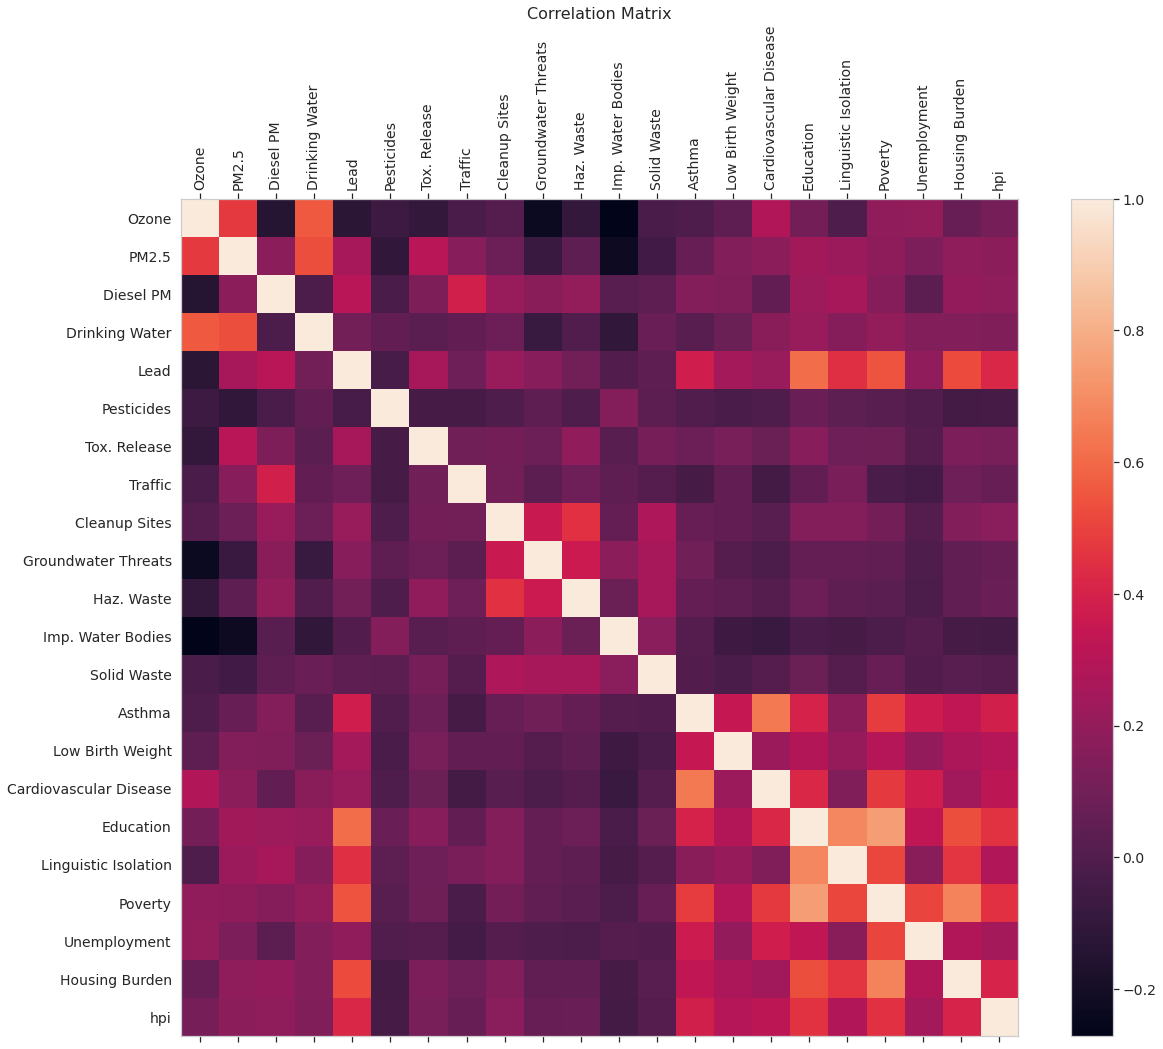

In [45]:
df = dfall
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [46]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [47]:
# using VIF on the bike_rental dataset

train_x_VIF = drop_column_using_vif_(train_x, thresh=5)
print("The columns remaining after VIF selection are:")
print(train_x_VIF.columns)

Max VIF: 4.096780895432122
The columns remaining after VIF selection are:
Index(['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides',
       'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats',
       'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma',
       'Low Birth Weight', 'Cardiovascular Disease', 'Education',
       'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The correlation matrix shows that some multicollinearity exists between variables with the highest being between poverty and education. However, the VIF with a threshold of 5 does not drop any of the variables.

### 6.3 In-depth Analysis

#### **Linear regression**  

In [48]:
lr = LinearRegression()
lr.fit(X=train_x_VIF, y=train_y)

# repeat with the statsmodel to print out more details 
import statsmodels.api as sm

lr2 = sm.OLS(endog=train_y,exog=sm.add_constant(train_x_VIF)).fit()
lr2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hpi   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     80.13
Date:                Sat, 23 Apr 2022   Prob (F-statistic):          9.93e-279
Time:                        12:52:25   Log-Likelihood:                -13970.
No. Observations:                3506   AIC:                         2.798e+04
Df Residuals:                    3484   BIC:                         2.812e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.4886      1.741     -2.004      0.045      -6.902      -0.075
Ozone                    147.5083     32.953      4.476      0.000      82.899     212.118
PM2.5                     -0.4418      0.153     -2.885      0.004      -0.742      -0.142
Diesel PM                  2.9040      1.327      2.188      0.029       0.302       5.506
Drinking Water             0.0014      0.001      1.019      0.308      -0.001       0.004
Lead                       0.0981      0.015      6.693      0.000       0.069       0.127
Pesticides                -0.0002   9.17e-05     -1.918      0.055      -0.000    3.88e-06
Tox. Release            7.363e-05   7.09e-05      1.039      0.299   -6.53e-05       0.000
Traffic                    0.0005      0.000      2.110      0.035    3.22e-05       0.001
Cleanup Sites              0.1163      0.020      5.936      0.000       0.078       0.155
Groundwater Threats        0.0067      0.009      0.726      0.468      -0.011       0.025
Haz. Waste                -0.0562      0.218     -0.258      0.796      -0.483       0.370
Imp. Water Bodies         -0.1415      0.052     -2.709      0.007      -0.244      -0.039
Solid Waste               -0.1672      0.064     -2.632      0.009      -0.292      -0.043
Asthma                     0.0749      0.012      6.392      0.000       0.052       0.098
Low Birth Weight           1.1279      0.157      7.171      0.000       0.819       1.436
Cardiovascular Disease     0.0655      0.070      0.942      0.346      -0.071       0.202
Education                  0.2385      0.034      6.968      0.000       0.171       0.306
Linguistic Isolation      -0.1245      0.044     -2.862      0.004      -0.210      -0.039
Poverty                    0.0478      0.029      1.662      0.097      -0.009       0.104
Unemployment               0.0528      0.081      0.651      0.515      -0.106       0.212
Housing Burden             0.2660      0.044      6.095      0.000       0.180       0.352
==============================================================================
Omnibus:                      508.599   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6051.019
Skew:                          -0.261   Prob(JB):                         0.00
Kurtosis:                       9.415   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

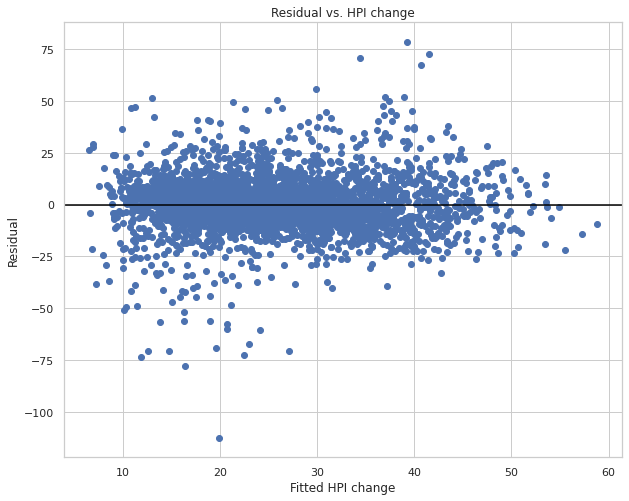

In [49]:
sns.set_theme( style='whitegrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 
f = plt.figure(figsize=(10, 8))
plt.scatter(lr2.fittedvalues, lr2.resid)
# adding title and labels
plt.xlabel('Fitted HPI change')
plt.ylabel('Residual')
plt.title('Residual vs. HPI change')
plt.axhline(y = 0, color = "black", linestyle = "-")
plt.show()
#plt.savefig("residuals.png")

As expected, the R2 is very low, and the p-values indicate that many of the variables are statistically insignificant. Furthermore, the dense Residuals versus fit plot does not convey a constant variance of the residuals indicating that the assumptions of the linear regression model are not met.

In [50]:
# select the same columns from test_x as train_x_VIF
test_x_VIF = test_x[train_x_VIF.columns] # select the VIF columns that the train date by using it as a selector

# using the model.score function to get the R2 on the testing data
lr.score(X=test_x_VIF, y=test_y)

0.32404448595910973

<AxesSubplot:title={'center':'Modal Coefficients'}>

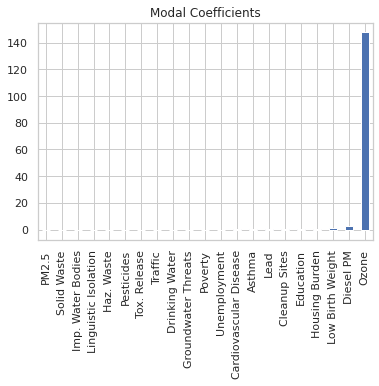

In [51]:
#checking the magnitude of coefficients

predictors = train_x_VIF.columns

coef = pd.Series(lr.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### **Random Forest**

The [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) is an ensemble method, fitting multiple Decision Tree Classifiers on subsets of the dataset. The output is the average of these sub-trees. 

In [52]:
from sklearn.ensemble import RandomForestRegressor

#use the RandomForestRegressor with default hyperparameters
reg_random_forest = RandomForestRegressor(random_state=random_state)

#make sure to use the right train test (since I want to do validation as well)
reg_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

The R2 score of this model is:

In [53]:
print("R2 on the training data:")
print(reg_random_forest.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(reg_random_forest.score(X=X_test, y=y_test))

R2 on the training data:
0.9118727668621767
R2 on the testing data:
0.3391505602537558


While the R2 on the training data is very high the rather low R2 on the testing data indicates overfitting. 

**HYPERPARAMETER TUNING**

two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

There are of course more hyperparameters that can be tuned, but we will focus on: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually, a higher number of trees improves the model's performance. However, it is also slowing down the training process. 
        
      
* ```max_depth``` (default=None): The depth (splits) of each tree 
   
   Usually, the deeper the tree the more information it captures about the data. However, allowing maximum depth might result in overfitting. 

In [54]:
# set values for the hyperparameters tuning
estimatorlist= [50,100,120,150,200,220,250]
depthlist= [8,10,13,15,18,30]

##### **Holdout validation**

Holdout validation will be used here, by specifying the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of indices.

In [55]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [56]:
%%time

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
             }

rf = RandomForestRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(rf, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 18, 'n_estimators': 220}
The best score is: 
0.326612504174577
CPU times: user 2min 41s, sys: 72.5 ms, total: 2min 41s
Wall time: 2min 41s


Now a final model with the tuned hypermarameters can be created:

In [57]:
%%time
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

CPU times: user 5.87 s, sys: 39.8 ms, total: 5.91 s
Wall time: 5.91 s


RandomForestRegressor(max_depth=18, n_estimators=220, random_state=42)

In [58]:
%%time
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9077891878539069
The score on the development data:
0.326612504174577
CPU times: user 157 ms, sys: 153 µs, total: 157 ms
Wall time: 151 ms


The Random Forest Regressor Model tuned with Holdout Validation has slightly worsened the performance, indicating that the default values were perhaps more appropriate.

##### **Cross-validation**

We will now try Cross-validation 

In [59]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [60]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 18, 'n_estimators': 150}
The best score is: 
0.3794962761713497
CPU times: user 12min 42s, sys: 263 ms, total: 12min 42s
Wall time: 12min 42s


In [61]:
rf_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_final.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, n_estimators=150, random_state=42)

In [62]:
print('The score on the training data:')
print(rf_final.score(X_train, y_train))
print('The score on the development data:')
print(rf_final.score(X_val, y_val))

The score on the training data:
0.9062931804698041
The score on the development data:
0.3209658244017163


The Random Forest Regressor Model tuned with Cross Validation, also returns slightly worse results. (In the default parameters max_depth is defined as None which might explain the difference here). Since Cross-validation is generally considered more robust we will keep the later model. 

##### RF final estimate of performance 

Using the test set (that has not been used at any stage during the model training and validation process) the final estimate of the RF model can be reported. 

In [63]:
rf_final.score(X_test, y_test)

0.3437978369054191

We can visualise the predicted and actual values with the following plot 

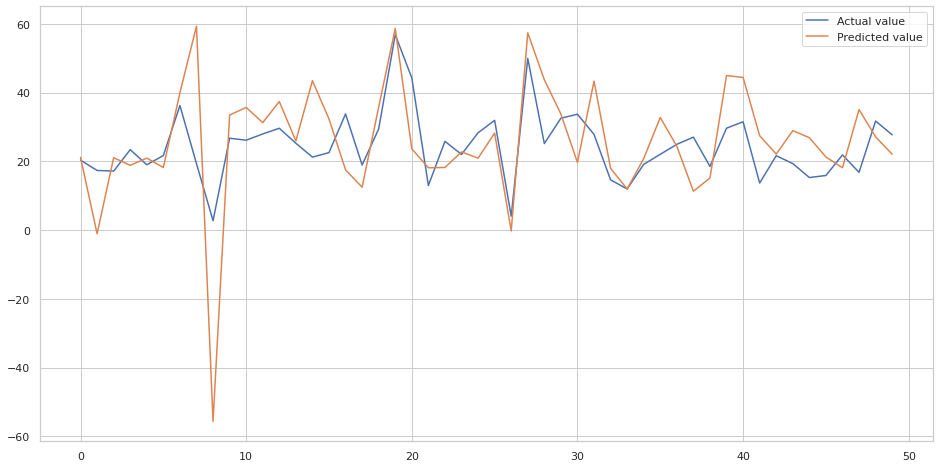

In [64]:
# test
y_pred = rf_final.predict(X_test)

test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


While a **validation curve** is not used to tune a model, because it might lead to the model being biased and not a good estimate of the generalization of the model, it is useful for evaluating the existing model based on hyper-parameters. 

In [65]:
%%time
n_estimators_range = [10,50,100,150,200,250]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

CPU times: user 1min 28s, sys: 39.9 ms, total: 1min 28s
Wall time: 1min 28s


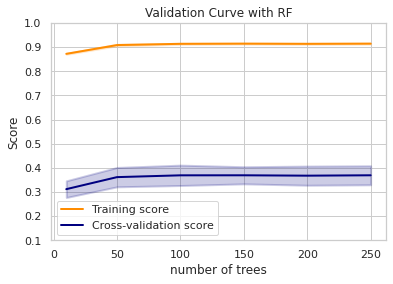

CPU times: user 139 ms, sys: 10 ms, total: 149 ms
Wall time: 140 ms


In [66]:
%%time

# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Ideally the validation and training curve look similar as it is this case and the plot shows that the training and development scores do not change significantly with the number of trees the score seems to stabilise after the value of approximately 150 trees for the validation set. 

In [67]:
%%time
max_depth_range= [5,10,15,30]

train_scores, valid_scores = validation_curve(estimator=RandomForestRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

CPU times: user 35.3 s, sys: 20 ms, total: 35.3 s
Wall time: 35.3 s


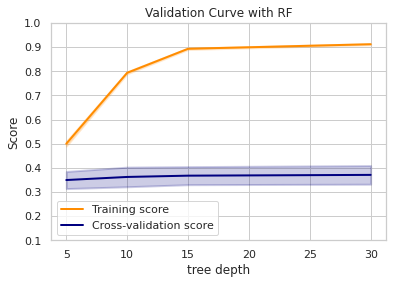

CPU times: user 176 ms, sys: 75 µs, total: 176 ms
Wall time: 157 ms


In [68]:
%%time

# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with RF")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Tree depth seems to affect the score values more, with the training score to improve when the tree is deeper as expected. However, the validation score seems to only slightly vary between the values of 10-18. Here the two curves are rather different with the training curve reaching high scores quickly which indicates overfitting.

##### **Indicative Tree Visualisation**

Since Random Forest is an assemble method, it does not really make sense to visualise the trees. However, visualising a few trees can give an indicative image and help at interpreting the results. We will plot just 2 trees.

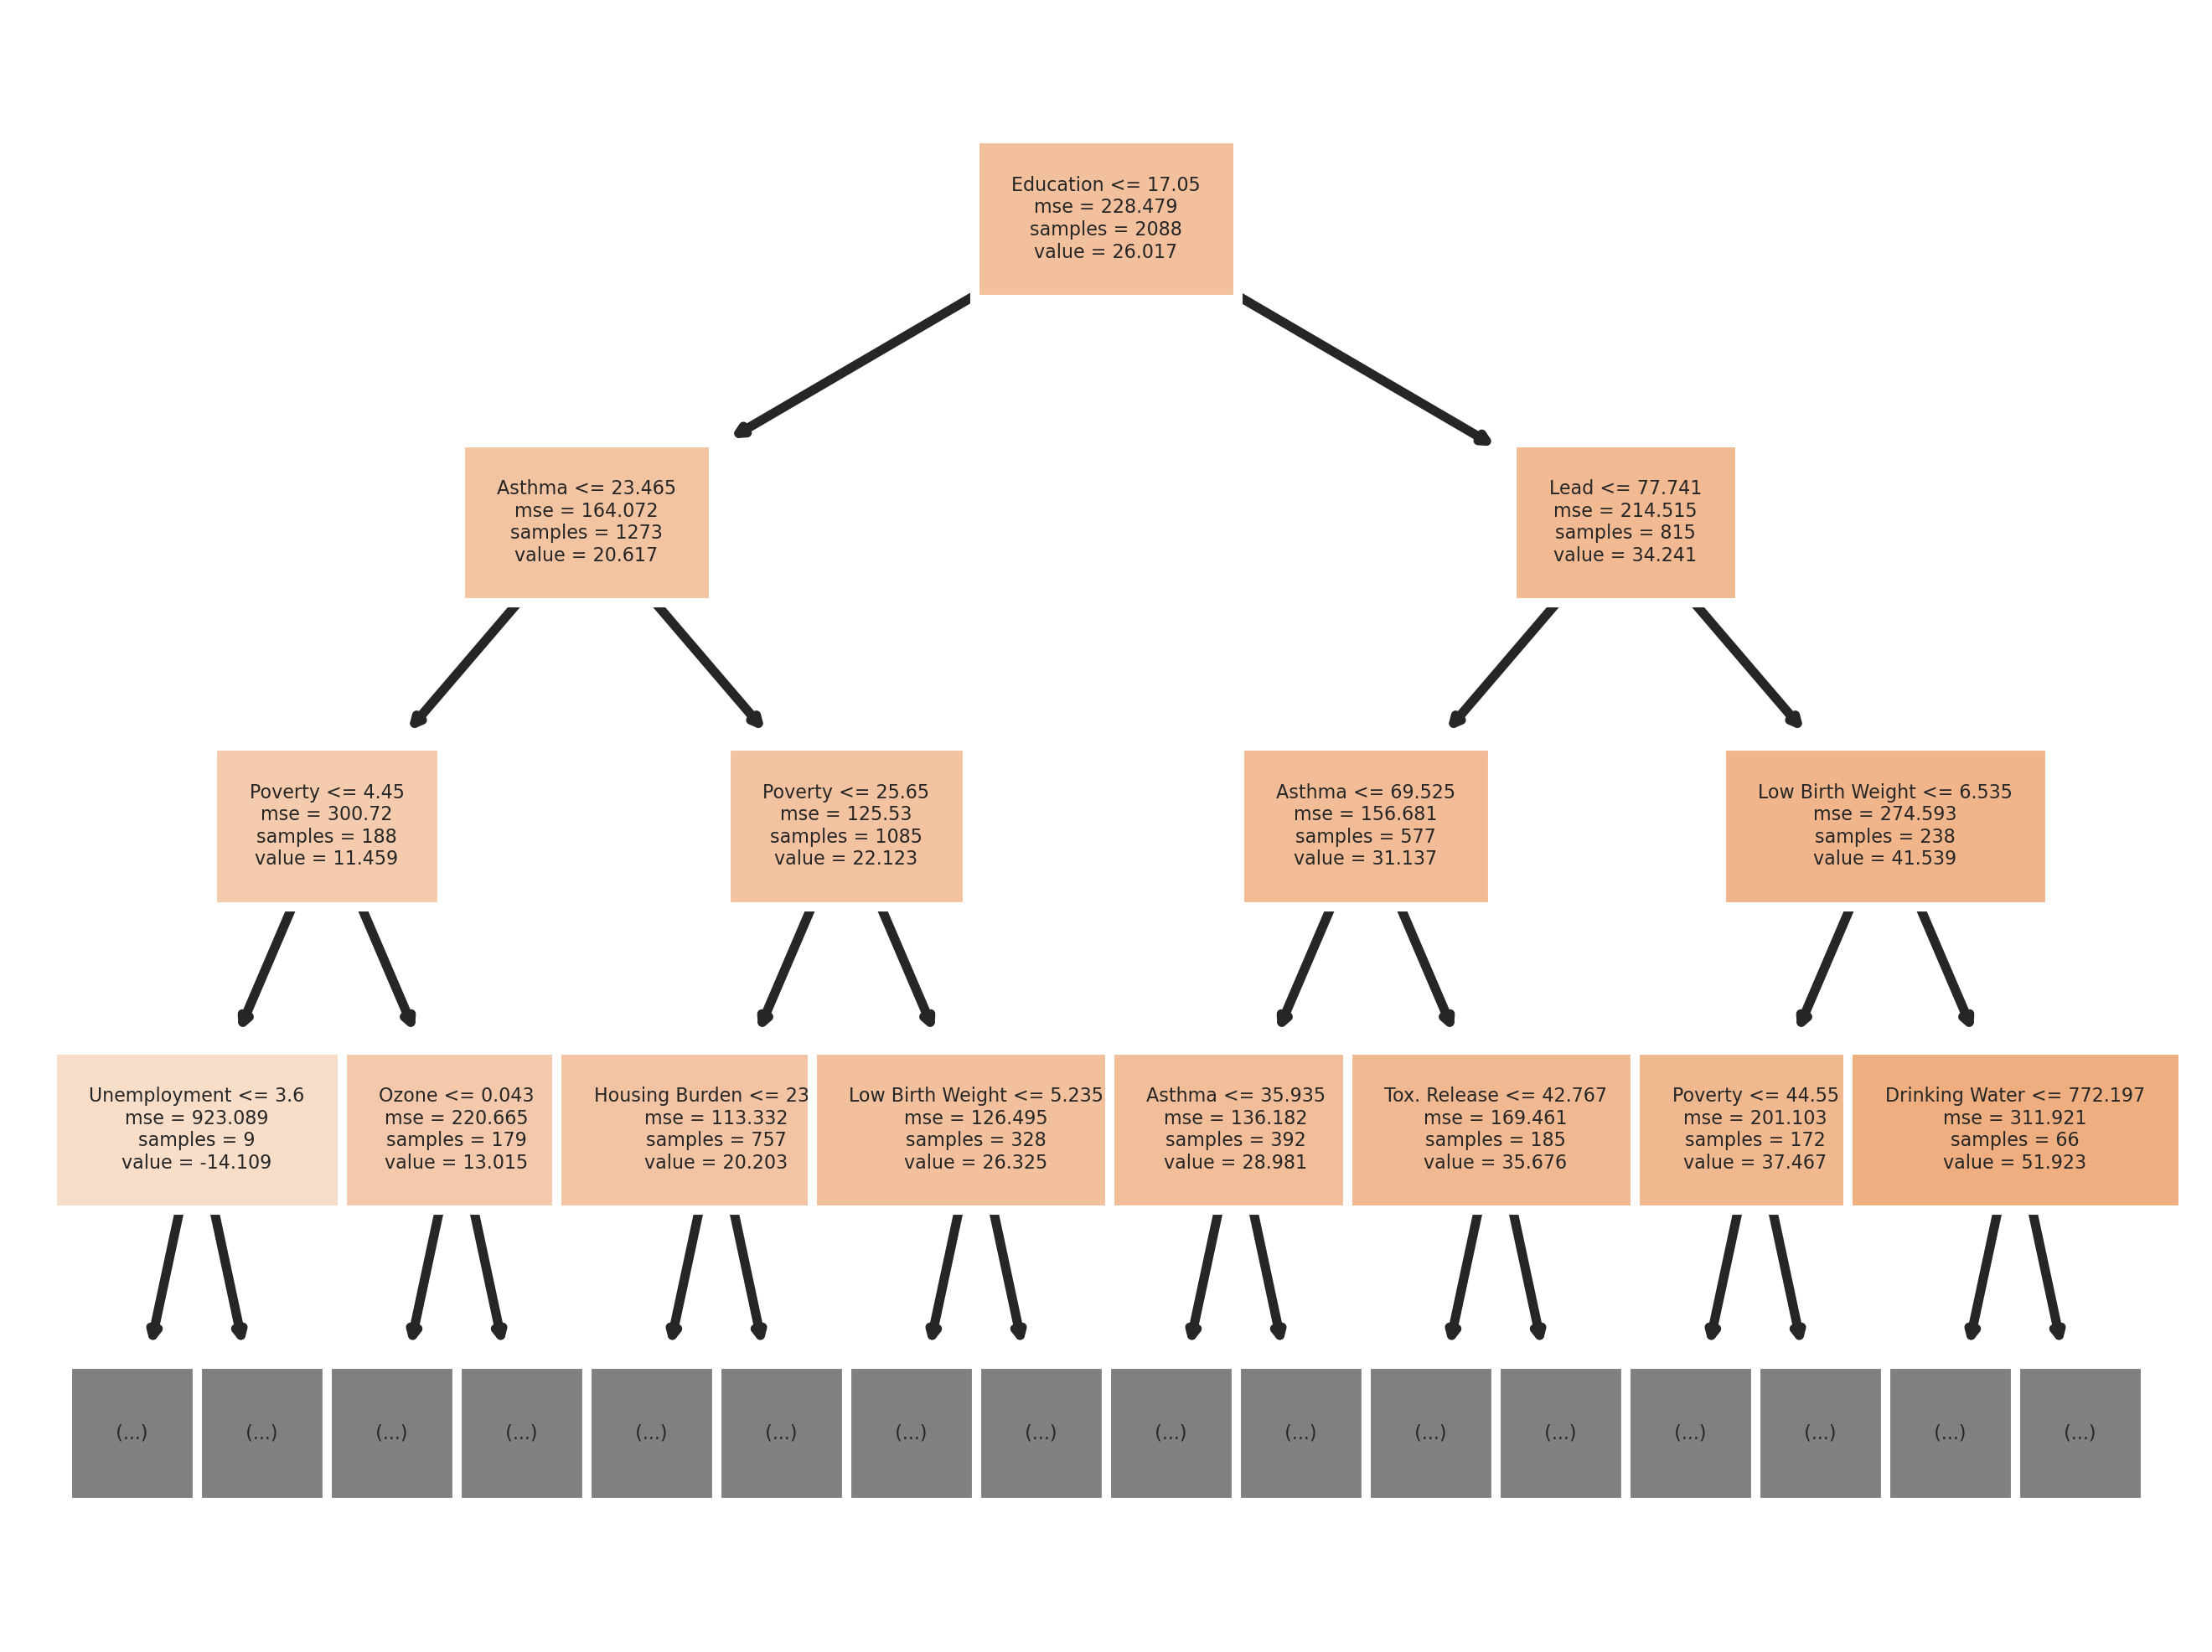

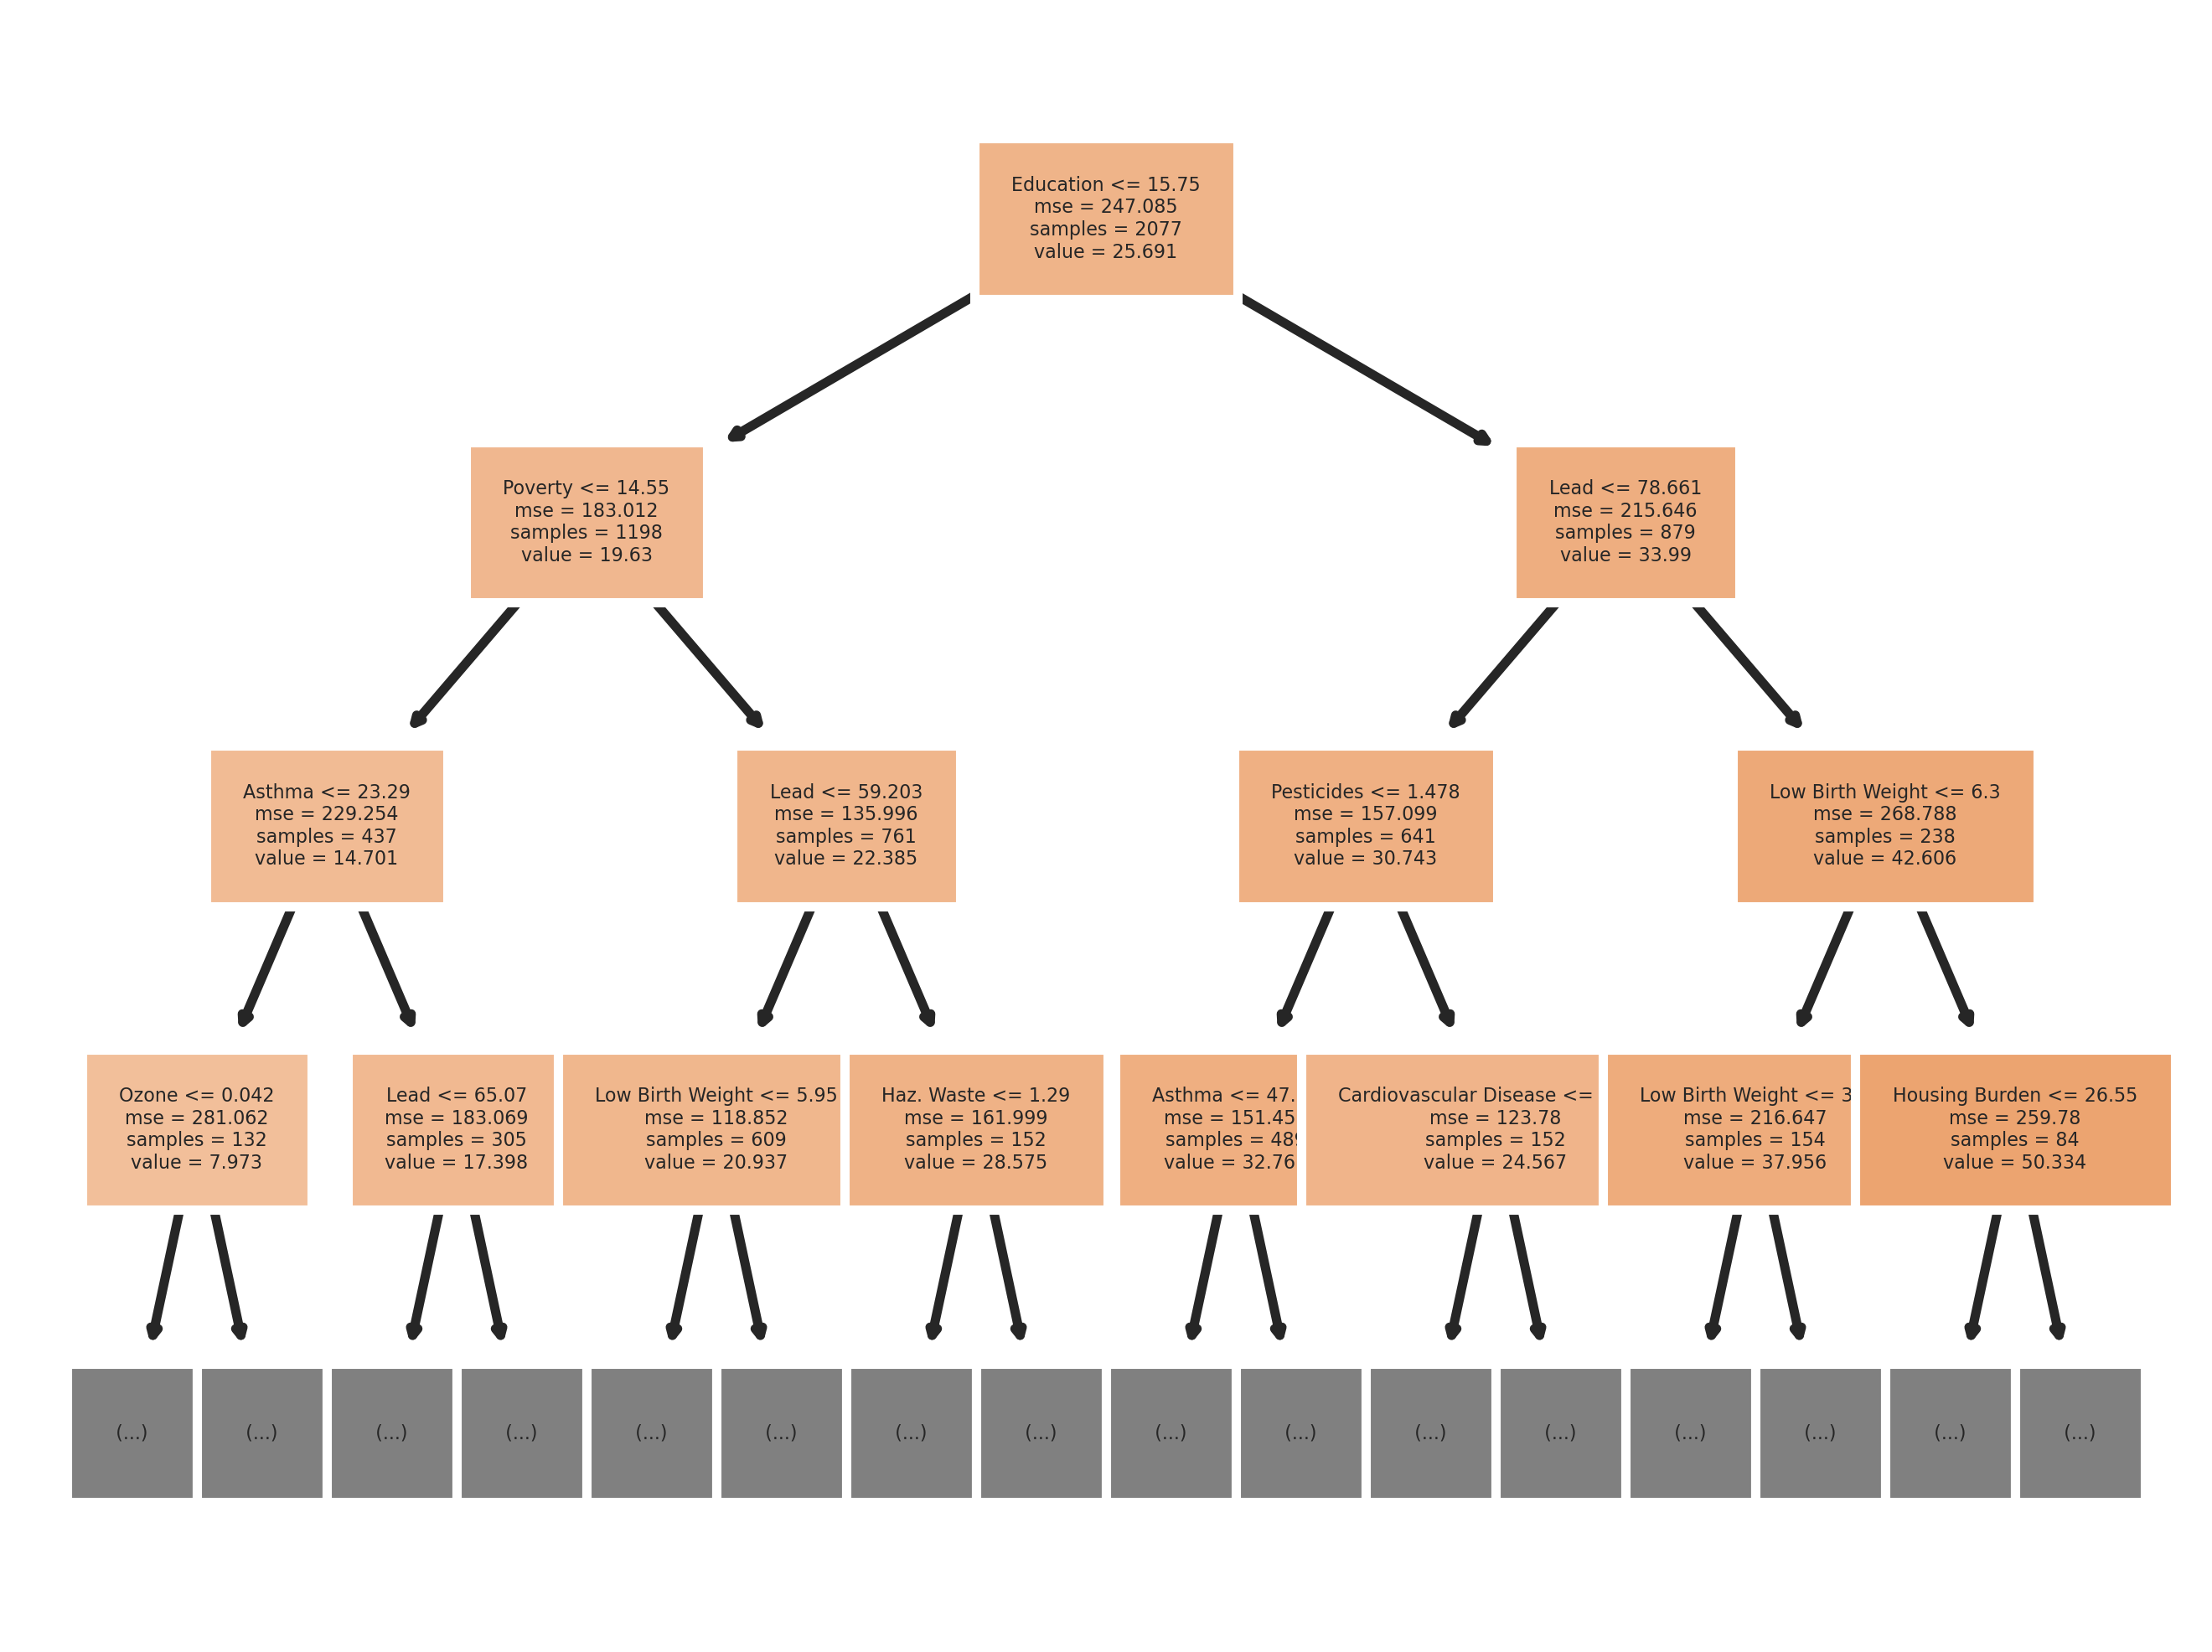

In [69]:
# code from https://github.com/UCL-DSS/random-forest-workshop/blob/main/Workshop.ipynb

from sklearn import tree
import numpy as np

a = np.array(y_test.unique())
a = a.astype('<U10')

#visulise the first 2 trees adn only to a depth of 3
for x in range (0, 2):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,3), dpi=800)
    tree.plot_tree(rf_final.estimators_[x],max_depth=3, fontsize=2,
                   feature_names = X.columns, 
                   class_names = a,
                   filled = True)

The plots above show the split process of the 2 decision tree examples, where "education" is used in the first level split. However, to get a better picture of the importance of each feature we will use the Permutation Feature Importance below.

#### Interpretation: permutation feature importance

Using the rfpimp package, the importance of each variable can be computed. For this the testing set needs to be used (not used for model training) to avoid biased results. 

In [70]:
! pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=7260674222d8981d93ea0f71c5e99138e2fc6c13fde493f4e72301bfbd77f6d2
  Stored in directory: /home/jovyan/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [71]:
%%time
import rfpimp
imp = rfpimp.importances(rf_final, X_test, y_test) # permutation
print(imp)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Education                                                0.1185
Asthma                                                   0.0995
Lead                                                     0.0651
Ozone                                                    0.0263
Poverty                                                  0.0153
PM2.5                                                    0.0145
Pesticides                                               0.0135
Housing Burden                                           0.0132
Drinking Water                                           0.0120
Tox. Release                                             0.0115
Low Birth Weight                                         0.0101
Unemployment                                             0.0089
Cleanup Sites                                            0.0077
Cardiovascular Disease                  

Text(0.5, 1.0, 'Feature importances from the Random Forest Regressor')

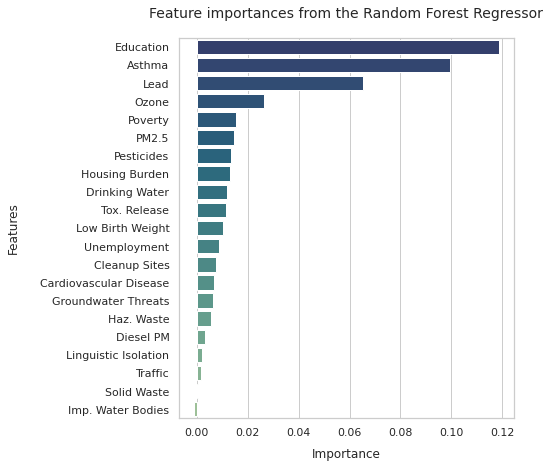

In [72]:
# create plot for model comparison later
sns.set(style="whitegrid")
plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=imp.index.values, 
                  data=imp,
                  order = imp.index.values,
                  palette="crest_r")
ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#### **XGBoost Regressor (GBDT)**

A GBDT (Gradient Boosting Decision Tree) model will be used and compared to the previous models. 

The main difference to The random forest, is that in this ensemble learning the models are trained sequentially using the results of previous models as an input to the next (by assigning lower weight to correctly predicted outcomes and higher weight to the wrongly predicted outcomes) [LINK](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663)

The [XGBoost](https://xgboost.readthedocs.io/en/stable/parameter.html) package will be used for this

In [73]:
! pip install XGBoost

In [74]:
import xgboost as xgb

#create the XGB boost model with default hyperparameters
xgb_model = xgb.XGBRegressor(random_state = random_state)

#fit the model the training set
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Compare the perfomance of the XGBmodel on the training and testing set:

In [75]:
print("R2 on the training data:")
print(xgb_model.score(X=X_train, y=y_train))
print("R2 on the testing data:")
print(xgb_model.score(X=X_test, y=y_test))

R2 on the training data:
0.9771590642550826
R2 on the testing data:
0.34271243293721376


The XGB model seems to perform better than the previous models on the testing set, but this uncalibrated model does not perform well on the testing data

**HYPERPARAMETER TUNING**

Similarly to the above, two methods will be compared:
* Holdout validation (grid search)
* Cross validation (grid search)

The hyperparameters we will tune are: 
* ```n_estimators ```(default=100): The number of decision trees.

    Usually a higher number of trees improves the model's performance. However, it is also slowing down the training process. 
        
      
* ```max_depth``` (default=6): The depth (splits) of each tree 
   
   Usually the deeper the tree the more information it captures about the data. However, allowing maximum depth might result in overfitting. 
   
* ```learning_rate``` (default=0.3): 

* ```colsample_bytree``` (default=1): 

In [76]:
# set values for the hyperparameters
estimatorlist= [10,15,20,100,200,250]
depthlist= [2,5,10,12,15,30]
learningratelist = [0.01, 0.05, 0.1,0.3]
colsampletreelist = [0.5, 0.7]

##### **Holdout validation**

Holdout validation will be used here, by specifying the 'cv' parameter (the cross validation splitting strategy) as an iterable yielding (train, test) as arrays of indices.

In [77]:
# merge training and validation data, as required by GridSearchCV
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])                       

# the index list of training and validation data in the merged dataset
# in X_train_val, the first n rows are from X_train and the remaining rows are from X_val. Here n=X_train.shape[0]
ind_train = list(range(X_train.shape[0]))
ind_val = list(range(X_train.shape[0], X_train_val.shape[0]))

In [78]:

from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators': estimatorlist
             ,'max_depth': depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }

xr = xgb.XGBRegressor(random_state=random_state)

# cv: An iterable yielding (train, test) splits as arrays of indices.
clf = model_selection.GridSearchCV(xr, parameters, cv=[(ind_train, ind_val)])

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}
The best score is: 
0.35281066590182186


Now a final model with the tuned hypermarameters can be created:W

In [79]:

xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)
xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
print('The score on the training data:')
print(xgb_final.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final.score(X_val, y_val))

The score on the training data:
0.9928801346922654
The score on the development data:
0.35281066590182186


This time the hyperparameter tuning has slightly improved the model's performance on both the training and development set. However, the very high R2 on the training data indicates that the model is overfitting.

##### **Cross-validation**


In [81]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

In [82]:
from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators':estimatorlist
              ,'max_depth':depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }
xgb_model = xgb.XGBRegressor(random_state = random_state)

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(xgb_model, parameters)

clf.fit(X_train_val, y_train_val)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
The best score is: 
0.39194364879726445


The two validation methods, pick the same values for all hyperparameters except n_estimators (150 in cross-validation, 200 in holdout validation). The best score result is also almost exactly the same

We create the final model with the tuned hyperparameters:

In [83]:
xgb_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)

xgb_final.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
print('The score on the training data:')
print(xgb_final.score(X_train, y_train))
print('The score on the development data:')
print(xgb_final.score(X_val, y_val))

The score on the training data:
0.7615143075803263
The score on the development data:
0.33080027154680114


The XGBoost Model tuned with Cross Validation, also returns slightly worse results, but the difference between training and development has been reduced which indicates there is less overfitting, and the model might have better generalization. We will therefore keep this model.

Let's also plot the **validation curve** (also based on cross validation) for each parameter 

In [85]:
n_estimators_range = [10,20,30,40,50,70,100,150,200,250]

train_scores, valid_scores = validation_curve(estimator=xgb.XGBRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="n_estimators",
                                              param_range=n_estimators_range,
                                              cv=5)

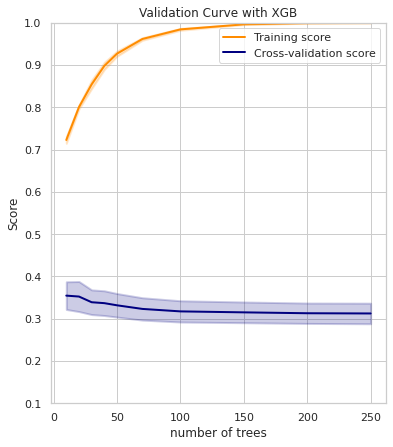

In [86]:
plt.figure(figsize=(6, 7))
# plotting the validation curve for n_estimators
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with XGB")
plt.xlabel(r"number of trees")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(n_estimators_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(n_estimators_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [87]:
max_depth_range= [2,5,10,12,15,30]

train_scores, valid_scores = validation_curve(estimator=xgb.XGBRegressor(), 
                                              X=X_train, y=y_train, 
                                              param_name="max_depth",
                                              param_range=max_depth_range,
                                              cv=5)

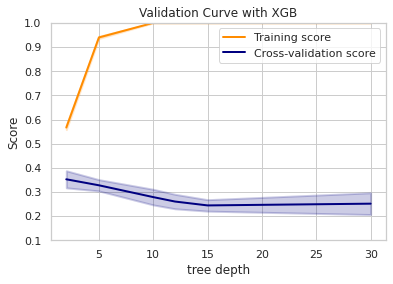

In [88]:
# plotting the validation curve for max_depth

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.title("Validation Curve with XGB")
plt.xlabel(r"tree depth")
plt.ylabel("Score")
plt.ylim(0.1, 1.0)
lw = 2
plt.plot(max_depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(max_depth_range, valid_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In both of the above plots, the Training and Validation curves are quite different with the training curve increasing abruptly while the validation curve is lagging behind, a sign of model overfitting. 

##### **XGB final estimate of performance**

Using the test set (that has not been used at any stage during the model training and validation process) the final estimate of the XGBoost model can be reported. 

In [89]:
xgb_final.score(X_test, y_test)

0.37341472824437416

#### Model comparison

Lets compare the performance of the models so far

In [90]:
# create a list of models
list_name_models = ['LR_VIF', 'RF', 'XGB']
# use the models from above
list_reg_models = [lr, rf_final, xgb_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models = pd.DataFrame.from_dict(dict_models, orient='index', columns=['R2_train_data', 'R2_test_data', 'R2_diff'])
df_models

R2_train_data  \
LR_VIF                                   0.3257   
RF                                       0.9063   
XGB                                      0.7615   

                                   R2_test_data  \
LR_VIF                                   0.3240   
RF                                       0.3438   
XGB                                      0.3734   

                                        R2_diff  
LR_VIF                                   0.0016  
RF                                       0.5625  
XGB                                      0.3881

While the RF performs best in the training data, the XGB scores better in the test data and has a smaller R2 difference indicating that this model is less subject to variance. 
However, the results are not good overall and also not significantly better than the baseline model which we know is not a good fit. 

##### **Interpretation: permutation feature importance**

Lets compute the importance of each variable for the XGB model 

In [91]:
#import rfpimp
impx = rfpimp.importances(xgb_final, X_test, y_test) # permutation
print(impx)
#viz = rfpimp.plot_importances(imp)
#viz.view()

                                                     Importance
Feature                                                        
Asthma                                                   0.0947
Education                                                0.0822
Tox. Release                                             0.0365
PM2.5                                                    0.0302
Ozone                                                    0.0299
Lead                                                     0.0278
Poverty                                                  0.0158
Drinking Water                                           0.0157
Linguistic Isolation                                     0.0148
Cleanup Sites                                            0.0140
Cardiovascular Disease                                   0.0115
Unemployment                                             0.0101
Pesticides                                               0.0100
Diesel PM                               

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

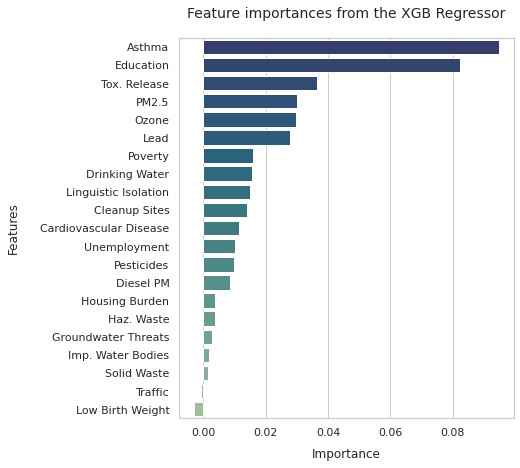

In [92]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 7))

ax = sns.barplot( x="Importance",
                  y=impx.index.values, 
                 #hue="room_type",
                  data=impx,
                  order = impx.index.values,
                  palette="crest_r")

#plt.xlabel(None)
#lt.ylabel(None)

ax.set_xlabel("Importance", 
             fontsize = 12,
             labelpad = 10)
ax.set_ylabel("Features",
             fontsize = 12,
             labelpad = 20)
ax.set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("Percentage of Women with higher education2.png", bbox_inches = 'tight', dpi=300)

#### PCA

This section will test whether using Principal Component Analysis (PCA) will improve the prediction results. This dimensionality reduction method will create a set of Principal Components (new features) from out independent variables based on the highest variance.

In [93]:
# create again the independent and dependent variables
X = dfall.drop(['hpi'], axis = 1)
y = dfall.hpi

# create a list with the names of independent variables
list_var_X = dfall.columns.tolist()
list_var_X.remove('hpi')

Before proceeding, the data needs scaling so that no feature dominates the results.

In [94]:
# standardisation of the X. This is essential for PCA.
from sklearn.preprocessing import StandardScaler
Xscaled = StandardScaler().fit_transform(X)

In [95]:
from sklearn.decomposition import PCA

pca = PCA(random_state=random_state)

# fit the components
X_new_components = pca.fit_transform(Xscaled)

In [96]:
print(list_var_X)
print(len(list_var_X))

['Ozone', 'PM2.5', 'Diesel PM', 'Drinking Water', 'Lead', 'Pesticides', 'Tox. Release', 'Traffic', 'Cleanup Sites', 'Groundwater Threats', 'Haz. Waste', 'Imp. Water Bodies', 'Solid Waste', 'Asthma', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']
21


Below we can print the makeup of each component. Each component is a linear combination of the previous independent variables.

In [97]:
df_PrincipleComp = pd.DataFrame(pca.components_, columns = list_var_X)
df_PrincipleComp

Ozone  \
0                                    0.0976   
1                                   -0.4254   
2                                    0.3281   
3                                   -0.2417   
4                                    0.0463   
5                                    0.0478   
6                                   -0.1554   
7                                   -0.0252   
8                                    0.0221   
9                                    0.0066   
10                                  -0.0075   
11                                  -0.0672   
12                                   0.0301   
13                                   0.0425   
14                                   0.0130   
15                                  -0.3226   
16                                   0.4148   
17                                   0.0268   
18                                   0.3514   
19                                   0.4495   
20                                   0.0628   

                                      PM2.5  \
0                                    0.1979   
1                                   -0.2157   
2                                    0.4617   
3                                    0.0932   
4                                   -0.0716   
5                                    0.0387   
6                                    0.2228   
7                                    0.0081   
8                                   -0.0823   
9                                   -0.1955   
10                                   0.1232   
11                                   0.0906   
12                                  -0.0655   
13                                  -0.0941   
14                                   0.0060   
15                                   0.0585   
16                                   0.0802   
17                                  -0.6532   
18                                  -0.1026   
19                                  -0.3270   
20                                  -0.0252   

                                  Diesel PM  \
0                                    0.1645   
1                                    0.2466   
2                                    0.1523   
3                                    0.3178   
4                                   -0.1682   
5                                    0.3179   
6                                   -0.2330   
7                                    0.0492   
8                                   -0.1382   
9                                    0.0863   
10                                   0.0494   
11                                   0.2104   
12                                  -0.1100   
13                                  -0.5912   
14                                   0.1915   
15                                  -0.3200   
16                                  -0.0188   
17                                   0.1622   
18                                   0.0123   
19                                   0.0240   
20                                   0.0223   

                             Drinking Water  \
0                                    0.1551   
1                                   -0.2728   
2                                    0.4027   
3                                   -0.1668   
4                                    0.2434   
5                                    0.1314   
6                                    0.0369   
7                                    0.0020   
8                                    0.0830   
9                                   -0.1471   
10                                   0.2430   
11                                   0.0268   
12                                   0.0283   
13                                  -0.0293   
14                                   0.1432   
15                                   0.2459   
16                                  -0.4666   
17                                   0.4854   
18                                  -0.0

or visualise it as a heatmap

<AxesSubplot:>

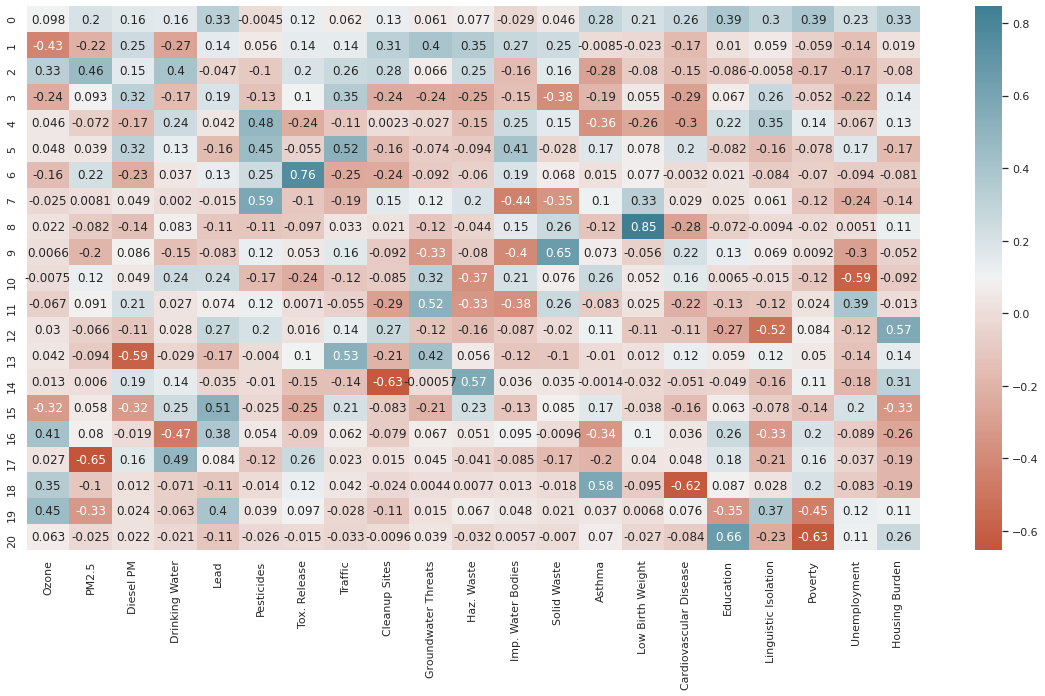

In [98]:
map = pd.DataFrame(pca.components_,columns=df_PrincipleComp.columns )
plt.figure(figsize=(20,10))
sns.heatmap(map,cmap=mypalette,annot=True)

#'twilight'

This heatmap and the colour bar basically represent the correlation between the various feature and the principal component itself.[LINK](https://datascienceplus.com/principal-component-analysis-pca-with-python/)

We can print the proportion of the variance explained by each component:

In [99]:
print('Explained variance ratio of each component:')
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.22207002 0.11643319 0.08936996 0.0720173  0.05887114 0.05080791
 0.04791913 0.04224884 0.03773272 0.03488992 0.03246393 0.03010411
 0.02779085 0.0266969  0.0246026  0.02213964 0.01785956 0.01634482
 0.01184863 0.01020976 0.00757906]


You can get the eigen values of the PCA. The ```explained_variance_``` gives the actual eigen values.

In [100]:
# explained variance is the eigenvalue
print('Eigenvalues of each component:')
print(pca.explained_variance_)

Eigenvalues of each component:
[4.6644682  2.44562003 1.8771708  1.51268694 1.23655846 1.06719439
 1.00651711 0.88741536 0.79255669 0.73284507 0.68188843 0.63232165
 0.58373273 0.56075479 0.51676511 0.46503189 0.37513094 0.34331472
 0.2488745  0.2144509  0.15919422]


One of the uses of PCA is to visualise high-dimensional data. Here we can visualise the first two components, using the HPI as the colour.

Text(0, 0.5, 'PC2')

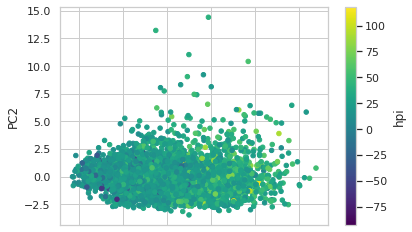

In [101]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the y variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(hpi = df.hpi)
ax = df_X_new_coord.plot.scatter(x = 0, y = 1, c = "hpi", colormap="viridis")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Text(0, 0.5, 'PC3')

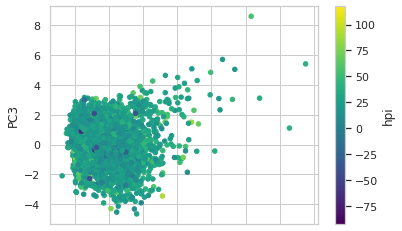

In [102]:
df_X_new_coord = pd.DataFrame(X_new_components)
# adding the y variable to df_X_new_coord
df_X_new_coord = df_X_new_coord.assign(hpi = df.hpi)
ax = df_X_new_coord.plot.scatter(x = 1, y = 2, c = "hpi", colormap="viridis")
ax.set_xlabel("PC2")
ax.set_ylabel("PC3")

There is revere overlap in the plots above and the interpretability is very low, which does not allow the validation of the components

#### Selecting the number of components

There are different methods for selecting the number of PCA components. 
1.  2 or 3 PCs for visualisation
2.  PC with eigenvalues > 1
3.  Scree plot 

While using 2 or 3 components will allow better visualisation, we will check the components with Eigenvalue larger than 1 and the Scree plot.


In [103]:
count=0
for i in ((pca.explained_variance_)>1).tolist():
    if i==True:
        count+=1
print(f'The PC with Eigenvalue larger that 1 are: {count}')
    

The PC with Eigenvalue larger that 1 are: 7


<AxesSubplot:xlabel='PC'>

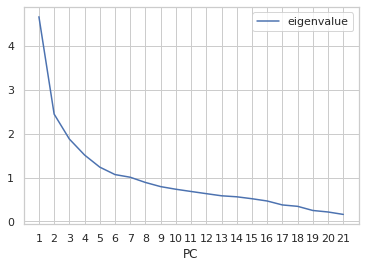

In [104]:
df1 = pd.DataFrame({'eigenvalue':pca.explained_variance_,
             'PC':list(range(1, pca.n_components_ + 1))})
df1.plot.line(x = 'PC', y = 'eigenvalue', xticks=df1.PC.values.tolist())

The plot above does not indicate one definite point as a transition point from a steep change to a gradual flattening. However, we could argue that the right values are 3-6 components: the plot decreases quickly before 3 and starts to flatten out after 6.

We can therefore go for the two ends PC=3 or PC=7

#### data preparation 

In [105]:
# create a new X dataset including three PCs (subset with the first three principal components)

X_three_pc = X_new_components[:,[0,1,2]]
X_seven_pc =  X_new_components[:,[0,1,2,3,4,5,6]]

In [106]:
# try with 7 PCs
#X_PCA = X_three_pc
X_PCA = X_seven_pc

## Random Forest after PCA

In this section, we will use the random forest method for this dataset.

In [107]:
# We apply train_test_split twice to obtain the three train, dev and test sets
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y, test_size=0.3, random_state=random_state)
X_val_PCA, X_test_PCA, y_val_PCA, y_test_PCA = train_test_split(X_test_PCA, y_test_PCA, test_size=0.5, random_state=random_state)

In [108]:
#from sklearn.ensemble import RandomForestRegressor
RF_PCA = RandomForestRegressor(random_state=random_state)
RF_PCA.fit(X_train_PCA, y_train_PCA)

RandomForestRegressor(random_state=42)

We can check the R2 score of this model.

In [109]:
print("R2 on the training data:")
print(RF_PCA.score(X=X_train_PCA, y=y_train_PCA))
print("R2 on the testing data:")
print(RF_PCA.score(X= X_test_PCA, y= y_test_PCA))

R2 on the training data:
0.9038671578328059
R2 on the testing data:
0.3351608111070964


The model performance has not impoved and there might be overfitting. 

##### **Cross-validation**


In [110]:
X_train_PCA = pd.DataFrame(X_train_PCA)
X_val_PCA =pd.DataFrame(X_val_PCA)
y_train_PCA =pd.DataFrame(y_train_PCA)
y_val_PCA= pd.DataFrame(y_val_PCA)

In [111]:
# we merge the training and validation data and use the merged data for cross validation
X_train_val_PCA = pd.concat([X_train_PCA, X_val_PCA])
y_train_val_PCA = pd.concat([y_train_PCA, y_val_PCA])

In [112]:
# set values for the hyperparameters
estimatorlist= [150,200,220]
depthlist= [5,8,10]

In [113]:
%%time
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators': estimatorlist
              ,'max_depth':depthlist
             }
rf = RandomForestRegressor()

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_train_val_PCA, y_train_val_PCA.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 5, 'n_estimators': 200}
The best score is: 
0.3088791581095355
CPU times: user 59.8 s, sys: 59.8 ms, total: 59.8 s
Wall time: 59.8 s


In [114]:
rf_PCA_final = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'], random_state=random_state)
rf_PCA_final.fit(X_train_PCA, y_train_PCA.values.ravel())

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [115]:
print('The score on the training data:')
print(rf_PCA_final.score(X_train_PCA, y_train_PCA))
print('The score on the development data:')
print(rf_PCA_final.score(X_val_PCA, y_val_PCA))

The score on the training data:
0.4062990278380888
The score on the development data:
0.34115507453813265


##### RF_PCA final estimate of performance 

Using the test set(that has not been used at any stage during the model training and validation process) the final estimate of the RF model can be reported. 

In [116]:
rf_PCA_final.score(X_test_PCA, y_test_PCA)

0.320055883510442

## XGB after PCA

In [117]:
#from sklearn.ensemble import RandomForestRegressor
XGB_PCA = xgb.XGBRegressor(random_state=random_state)
XGB_PCA.fit(X_train_PCA, y_train_PCA)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

We can check the R2 score of this model.

In [118]:
print("R2 on the training data:")
print(XGB_PCA.score(X=X_train_PCA, y=y_train_PCA))
print("R2 on the testing data:")
print(XGB_PCA.score(X= X_test_PCA, y= y_test_PCA))

R2 on the training data:
0.9348338981044434
R2 on the testing data:
0.2558329147767292


Worse performance on the testing data, overfitting. 

##### **Cross-validation**


In [119]:
#from sklearn import model_selection

# set values for hyperparameters bearing in mind the results from the plots above
parameters = {'n_estimators':estimatorlist
              ,'max_depth':depthlist
              ,'learning_rate': learningratelist
              ,'colsample_bytree': colsampletreelist
             }
xgb_model = xgb.XGBRegressor(random_state = random_state)

# cv=5 by default, which means 5-fold cross-validation
clf = model_selection.GridSearchCV(xgb_model, parameters)

clf.fit(X_train_val_PCA, y_train_val_PCA.values.ravel())

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
The best score is: 
0.3075387832944306


In [120]:
xgb_PCA_final = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                             learning_rate=clf.best_params_['learning_rate'], 
                             max_depth=clf.best_params_['max_depth'],
                             colsample_bytree=clf.best_params_['colsample_bytree'], 
                             random_state=random_state)

xgb_PCA_final.fit(X_train_PCA, y_train_PCA)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
print('The score on the training data:')
print(xgb_PCA_final.score(X_train_PCA, y_train_PCA))
print('The score on the development data:')
print(xgb_PCA_final.score(X_val_PCA, y_val_PCA))

The score on the training data:
0.5945929875487805
The score on the development data:
0.3301535353842808


In [122]:
xgb_PCA_final.score(X_test_PCA, y_test_PCA)

0.31270967022838503

## Model comparison

In [123]:
%%time
# create a list of models
list_name_models = ['LR_VIF', 'RF', 'XGB','RF_PCA', 'XGB_PCA']
# use the models from above
list_reg_models = [lr, rf_final, xgb_final, rf_PCA_final, xgb_PCA_final]

dict_models = dict()

for name, model in zip(list_name_models, list_reg_models):
    if name == 'LR_VIF':
        dict_models[name] = [model.score(train_x_VIF, train_y), model.score(test_x_VIF, test_y), model.score(train_x_VIF, train_y) - model.score(test_x_VIF, test_y)]
    elif name == 'RF_PCA':
        dict_models[name] = [model.score(X_train_PCA, y_train_PCA), model.score(X_test_PCA, y_test_PCA), model.score(X_train_PCA, y_train_PCA) - model.score(X_test_PCA, y_test_PCA)]
    elif name == 'XGB_PCA':
        dict_models[name] = [model.score(X_train_PCA, y_train_PCA), model.score(X_test_PCA, y_test_PCA), model.score(X_train_PCA, y_train_PCA) - model.score(X_test_PCA, y_test_PCA)]
    else:
        dict_models[name] = [model.score(X_train, y_train), model.score(X_test, y_test),model.score(X_train, y_train) - model.score(X_test, y_test)]

# transform dict_models to dataframe
df_models_final = pd.DataFrame.from_dict(dict_models, orient='index', columns=['$R^{2}$ train data', '$R^{2}$ test data', '$R^{2}$ difference'])
df_models_final


CPU times: user 975 ms, sys: 590 ms, total: 1.56 s
Wall time: 412 ms


$R^{2}$ train data  \
LR_VIF                                    0.3257   
RF                                        0.9063   
XGB                                       0.7615   
RF_PCA                                    0.4063   
XGB_PCA                                   0.5946   

                               $R^{2}$ test data  \
LR_VIF                                    0.3240   
RF                                        0.3438   
XGB                                       0.3734   
RF_PCA                                    0.3201   
XGB_PCA                                   0.3127   

                              $R^{2}$ difference  
LR_VIF                                    0.0016  
RF                                        0.5625  
XGB                                       0.3881  
RF_PCA                                    0.0862  
XGB_PCA                                   0.2819

In [124]:
color1= "black"
color2 = "teal"
#color2= (0.7, 0.2, 0.1)
#color1 = (0.5,0.7,0.8)

# function to visualise the accuracy of the prediction results
def val_vs_predict_plot(yval, yval_predict, ytest, ytest_predict, title):
    yval_array = np.array(yval).flatten()
    ytest_array = np.array(ytest)
    yval_predict_array = np.array(yval_predict)
    ytest_predict_array = np.array(ytest_predict)
    y_values = np.concatenate([yval_array, yval_predict_array]).flatten()
    ymin, ymax = np.amin(y_values), np.amax(y_values)
    plt.subplot(2,2,final_models.index(model)+1)
    plt.scatter(yval_array, yval_predict_array, label=f'validation set  $R^{2}$={R2v:.3f}', color=color1, alpha=0.4)
    plt.scatter(ytest_array, ytest_predict_array, label=f'test set  $R^{2}$={R2t:.3f}', color=color2, alpha=0.4)
    plt.plot([ymin, ymax], [ymin, ymax], color= "k")
    plt.xlabel('measured', fontsize=12)
    plt.ylabel('predicted', fontsize=12)
    plt.title(f'{title} Validation-Prediction Plot', fontsize=14,pad = 8)
    plt.tick_params(labelsize=8)
    plt.legend()
    #plt.show()

<a id="ID_results"></a>
## 7.0 | Results and Discussion

This section summarises and interprets the results of the analysis performed.

The validation prediction plots below illustrate and compare the performance of the calibrated models on the validation and test sets. As the shape of the data demonstrates, none of the model performs well at predicting the actual values for the HPI change and the low R2 value confirms this with values below 40% in all cases. However, judging from the shape of the data, the XGBoost model without PCA seems to be the slightly better performing model. 

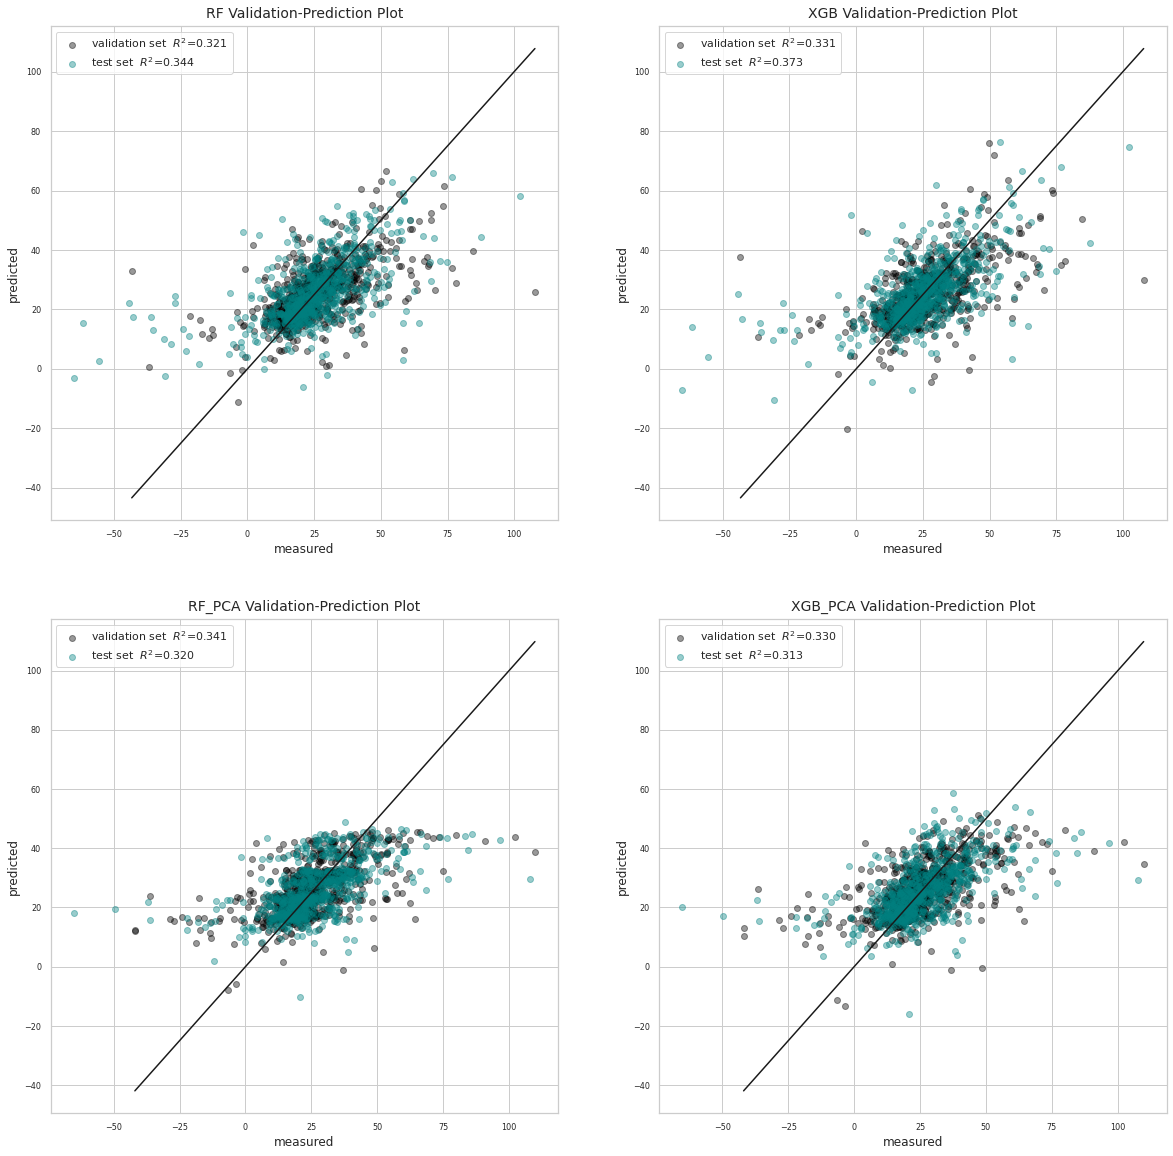

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20) )
name_models = ['RF', 'XGB','RF_PCA', 'XGB_PCA']
final_models = [ rf_final, xgb_final, rf_PCA_final, xgb_PCA_final]

for model,name in zip(final_models, name_models):
    if name=='RF_PCA':
        y_pred_val = model.predict(X_val_PCA)
        y_pred_test = model.predict(X_test_PCA)
        R2v=model.score(X_val_PCA, y_val_PCA)
        R2t=model.score(X_test_PCA, y_test_PCA)
        val_vs_predict_plot(y_val_PCA, y_pred_val, y_test_PCA, y_pred_test, name)
    elif name=='XGB_PCA':
        y_pred_val = model.predict(X_val_PCA)
        y_pred_test = model.predict(X_test_PCA)
        R2v=model.score(X_val_PCA, y_val_PCA)
        R2t=model.score(X_test_PCA, y_test_PCA)
        val_vs_predict_plot(y_val_PCA, y_pred_val, y_test_PCA, y_pred_test, name)
    else:
        y_pred_val = model.predict(X_val)
        y_pred_test = model.predict(X_test)
        R2v=model.score(X_val, y_val)
        R2t=model.score(X_test, y_test)
        val_vs_predict_plot(y_val, y_pred_val, y_test, y_pred_test, name)        
#plt.savefig("Validation_Prediction_Plots.png", bbox_inches = 'tight')

As expected, the linear regression model, while performing similarly on the training and testing sets, has poor performance overall. In fact, comparing the R2 values, the models do not perform significantly better than the linear regression model on the testing sets. 
The XGBoost Model records the highest R2 scores on the testing data despite performing worse than the RF model on the training set. The Random Forest model has a significant difference in the R2 scores between training and testing set, which indicates high bias and overfitting. 
After performing PCA on the dataset, the prediction score for both models and in all data sets has decreased. The drop however in the R2 difference indicates that these models, albeit less accurate perhaps have better generalisation. It has been argued that PCA is not always appropriate for predictions as it ‘pollutes’ the predictors (PCA or Polluting your Clever Analysis | R-bloggers, no date) which might explain why the performance has dropped.    

In [127]:
df_models_final

$R^{2}$ train data  \
LR_VIF                                    0.3257   
RF                                        0.9063   
XGB                                       0.7615   
RF_PCA                                    0.4063   
XGB_PCA                                   0.5946   

                               $R^{2}$ test data  \
LR_VIF                                    0.3240   
RF                                        0.3438   
XGB                                       0.3734   
RF_PCA                                    0.3201   
XGB_PCA                                   0.3127   

                              $R^{2}$ difference  
LR_VIF                                    0.0016  
RF                                        0.5625  
XGB                                       0.3881  
RF_PCA                                    0.0862  
XGB_PCA                                   0.2819

Feature Importance

Text(0.5, 1.0, 'Feature importances from the XGB Regressor')

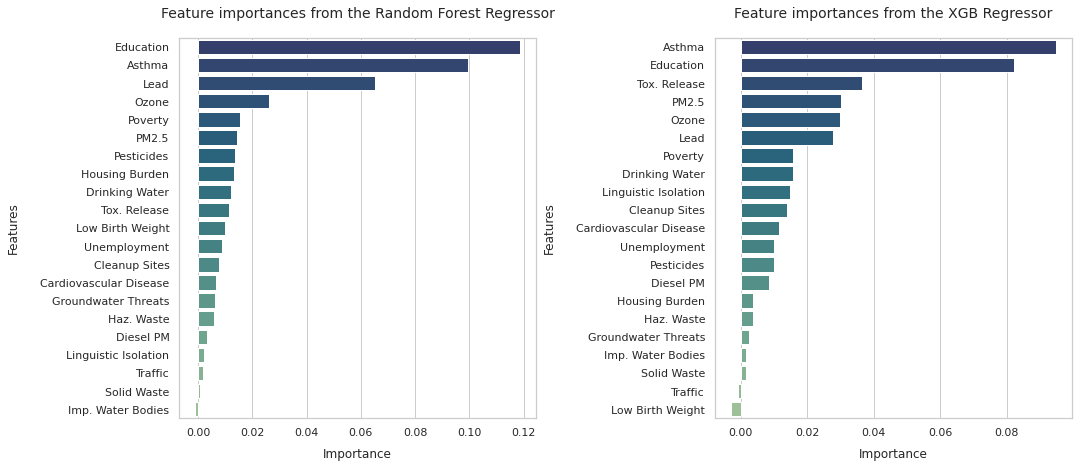

In [128]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1,2, figsize=(16, 7) ,sharey=False)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.5, hspace=None)

#plot 1
sns.barplot( x="Importance", y=imp.index.values, ax=ax[0],data=imp,order = imp.index.values, palette="crest_r")
ax[0].set_xlabel("Importance", fontsize = 12,labelpad = 10)
ax[0].set_ylabel("Features",fontsize = 12,labelpad = 20)
ax[0].set_title("Feature importances from the Random Forest Regressor", size=14, pad = 20)

#plot 2
sns.barplot( x="Importance", y=impx.index.values, data=impx,ax=ax[1], order = impx.index.values, palette="crest_r")
ax[1].set_xlabel("Importance", fontsize = 12, labelpad = 10)
ax[1].set_ylabel("Features",fontsize = 12, labelpad = 20)
ax[1].set_title("Feature importances from the XGB Regressor", size=14, pad = 20)

#plt.savefig("FeatureImportance_comparison.png", bbox_inches = 'tight', dpi=300)

Comparing the feature importance plots of the RF and XGB models, we identify Education, Asthma and Lead as the three most important ones in both models, one representative indicator for socioeconomic, health and environmental factors respectively. It should also be noted that in the XGB model feature importance seems more spread across the variables whilst in the RF model Education seems to dominate. The interpretation however of the above is rather difficult and since the model performance is weak the validity of this results is highly questionable. 

he compared methods and models do not perform well at predicting the change in HPI for the study area. Random Forest and XGBoost Regressors were chosen as they are considered relatively robust to outliers and can handle non-linear data, however there is a plethora of different algorithms and methods that have not been tested here and which might yield better results. Furthermore, the hyperparameter tuning performed in this analysis was certainly not exhaustive und could be optimised. It has been suggested that a better approach would be to widen the hyperparameters values tested by starting with a randomized search first to reduce the parameter space and then use a grid search to select the best hyperparameters (Grid Search vs. Randomized Search -, no date). 

The poor performance of the models might also be traced back to the datasets themselves. The limitations already mentioned such as the significant number of missing values, the extreme outliers and even the number and nature of variables used, all might have strongly influenced the models’ performance.  

Moreover, just as the traditional hedonic models, this analysis has not considered the spatial dimension and spatial autocorrelation which poses a significant limitation. Different spatial units might also lead to different results and need always to be considered in such studies. 


<a id="ID_conc"></a>
## 8.0 | Conclusion

In summary and returning to the research questions set at the beginning of the report, while a relationship between the variables has been identified, the constructed models do not suffice in accurately predicting the change HPI from the mentioned factors.
An extension of this work would investigate a different approach: restating the analysis as a classification methodology that will attempt the prediction of defined categories of HPI range, instead of individual values.
Finally, the prediction of the change in HPI solely from the above indicators can be scrutinised and considered incomplete since the housing market is most notably influenced by a range of factors such as the housing supply, speculative demand, interest rates and economic growth in general. It is therefore suggested that further research incorporates these and tests whether the inclusion of environmental, health and socioeconomic indicators improves the prediction performance.

<a id="ID_biblio"></a>
## Bibliography

August, L. et al. (no date) OEHHA Authors: OEHHA Editors: Acknowledgments.
Chew with Chione Lucina Muñoz Flegal, A. et al. (no date) Facing History, Uprooting Inequality: A Path to Housing Justice in California Thank you to Acknowledgments. Available at: http://www.policylink.org.
FHFA House Price Index | Federal Housing Finance Agency (no date). Available at: https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index.aspx (Accessed: April 12, 2022).
Grid Search vs. Randomized Search - (no date). Available at: https://maelfabien.github.io/machinelearning/GridRand/#randomized-search (Accessed: April 14, 2022).
Hanink, D.M., Cromley, R.G. and Ebenstein, A.Y. (2012) “Spatial Variation in the Determinants of House Prices and Apartment Rents in China,” Journal of Real Estate Finance and Economics, 45(2), pp. 347–363. doi:10.1007/s11146-010-9262-3.
Hedonic Regression Definition (no date). Available at: https://www.investopedia.com/terms/h/hedonic-regression.asp (Accessed: April 12, 2022).
Housing | Understanding Inequalities (no date). Available at: https://www.understanding-inequalities.ac.uk/research-themes/housing (Accessed: April 12, 2022).
Jafari, A. and Akhavian, R. (2019) “Driving forces for the US residential housing price: a predictive analysis,” Built Environment Project and Asset Management, 9(4), pp. 515–529. doi:10.1108/BEPAM-07-2018-0100.
Montero, J.M., Fernández-Avilés, G. and Mínguez, R. (2018) “Estimating environment impacts on housing prices,” in Environmetrics. John Wiley and Sons Ltd. doi:10.1002/env.2453.
Park, B. and Kwon Bae, J. (2015) “Using machine learning algorithms for housing price prediction: The case of Fairfax County, Virginia housing data,” Expert Systems with Applications, 42(6), pp. 2928–2934. doi:10.1016/j.eswa.2014.11.040.
PCA or Polluting your Clever Analysis | R-bloggers (no date). Available at: https://www.r-bloggers.com/2012/08/pca-or-polluting-your-clever-analysis/ (Accessed: April 14, 2022).
Phan, T.D. (2019) “Housing price prediction using machine learning algorithms: The case of Melbourne city, Australia,” in Proceedings - International Conference on Machine Learning and Data Engineering, iCMLDE 2018. Institute of Electrical and Electronics Engineers Inc., pp. 8–13. doi:10.1109/iCMLDE.2018.00017.
 


<a id="ID_append"></a>
## Appendix

Refrences that informed this analysis apart from the Bibliography above

https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

https://nycdatascience.com/blog/student-works/house-price-prediction-using-machine-learning-techniques/

https://datascienceplus.com/principal-component-analysis-pca-with-python/

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://mljar.com/blog/visualize-tree-from-random-forest/

https://medium.com/pursuitnotes/random-forest-regression-in-5-steps-with-python-2463b7ae9af8

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://mljar.com/blog/visualize-tree-from-random-forest/

In [ ]:
https://www.geeksforgeeks.org/validation-curve/
https://scikit-learn.org/stable/modules/learning_curve.html
https://practicaldatascience.co.uk/machine-learning/how-to-use-model-selection-and-hyperparameter-tuning
https://maelfabien.github.io/machinelearning/GridRand/#randomized-search

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.savefig("end.png", bbox_inches = 'tight', dpi=300)